## Importing Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve

## Data Preprocessing

In [2]:
pd.set_option('display.max_columns',90)
data=pd.read_excel(r'C:\Users\ASUS\Downloads\default of credit card clients.xls')
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,female,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,high school,married,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,male,high school,single,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,male,university,single,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,male,high school,married,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
data.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000,30000,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,NaN,2,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,female,university,single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,18112,14030,15964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15000.500000,167484.322667,NaN,NaN,NaN,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,NaN,NaN,NaN,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,NaN,NaN,NaN,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,NaN,NaN,NaN,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,NaN,NaN,NaN,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,NaN,NaN,NaN,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000


In [4]:
data.drop('ID', axis=1, inplace=True)

In [5]:
data.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [6]:
data.shape

(30000, 24)

In [7]:
data.corr()['default']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8824\2983125872.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['default']


LIMIT_BAL   -0.153520
AGE          0.013890
PAY_0        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
PAY_5        0.204149
PAY_6        0.186866
BILL_AMT1   -0.019644
BILL_AMT2   -0.014193
BILL_AMT3   -0.014076
BILL_AMT4   -0.010156
BILL_AMT5   -0.006760
BILL_AMT6   -0.005372
PAY_AMT1    -0.072929
PAY_AMT2    -0.058579
PAY_AMT3    -0.056250
PAY_AMT4    -0.056827
PAY_AMT5    -0.055124
PAY_AMT6    -0.053183
default      1.000000
Name: default, dtype: float64

In [8]:
avarage_corr=data.corr()['default'].mean()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8824\2447988378.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  avarage_corr=data.corr()['default'].mean()


In [9]:
avarage_corr

0.08897625257401605

In [10]:
data.dtypes

LIMIT_BAL     int64
SEX          object
EDUCATION    object
MARRIAGE     object
AGE           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
default       int64
dtype: object

In [11]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [12]:
dropped_columns = []

for i in data[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default']]:
    
    if abs(data.corr()['default'][i])<avarage_corr:
        dropped_columns.append(i)
    
data.drop(dropped_columns, axis=1, inplace=True)  

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8824\92729886.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  if abs(data.corr()['default'][i])<avarage_corr:


In [13]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default
0,20000,female,university,married,2,2,-1,-1,-2,-2,1
1,120000,female,university,single,-1,2,0,0,0,2,1
2,90000,female,university,single,0,0,0,0,0,0,0
3,50000,female,university,married,0,0,0,0,0,0,0
4,50000,male,university,married,-1,0,-1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,male,high school,married,0,0,0,0,0,0,0
29996,150000,male,high school,single,-1,-1,-1,-1,0,0,0
29997,30000,male,university,single,4,3,2,-1,0,0,1
29998,80000,male,high school,married,1,-1,0,0,0,-1,1


In [14]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'default'],
      dtype='object')

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[[
    'LIMIT_BAL', 
    'PAY_0', 
    'PAY_2', 
    'PAY_3',
    'PAY_4', 
    'PAY_5', 
    'PAY_6'
]]

vif=pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,1.145291,LIMIT_BAL
1,1.866151,PAY_0
2,3.119746,PAY_2
3,3.633879,PAY_3
4,4.341370,PAY_4
5,4.845040,PAY_5
6,3.313283,PAY_6


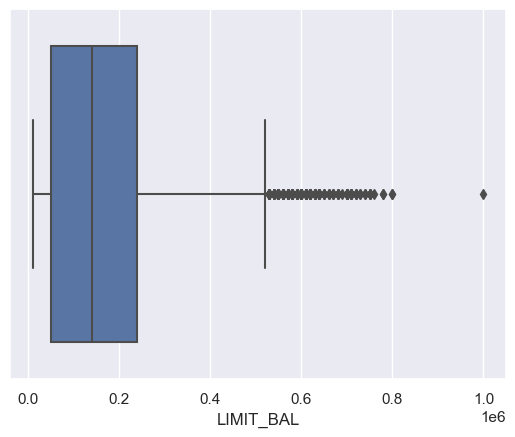

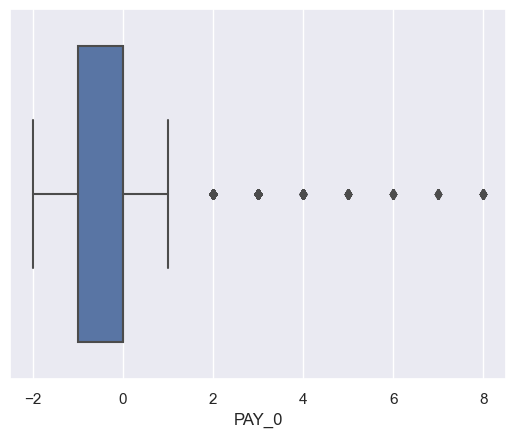

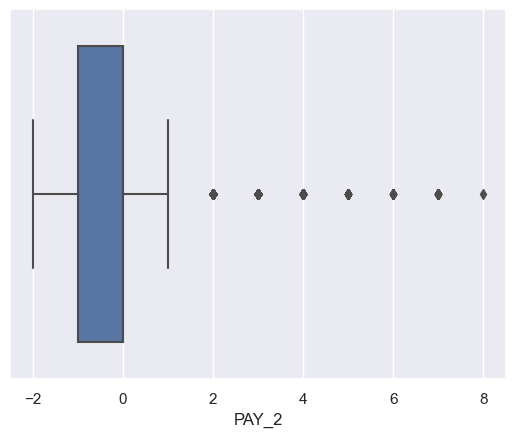

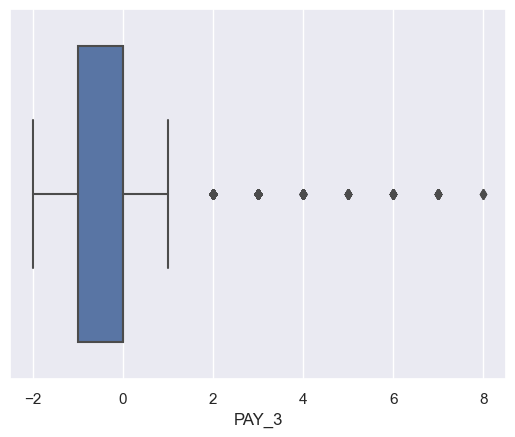

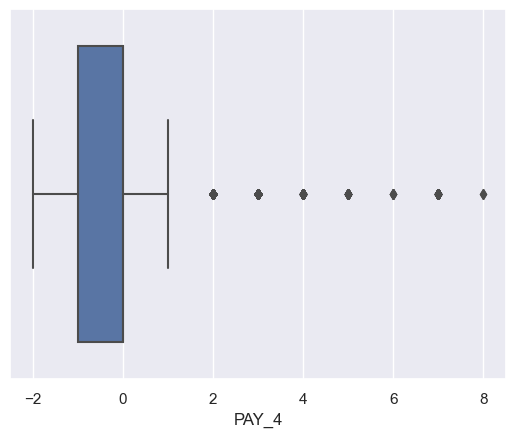

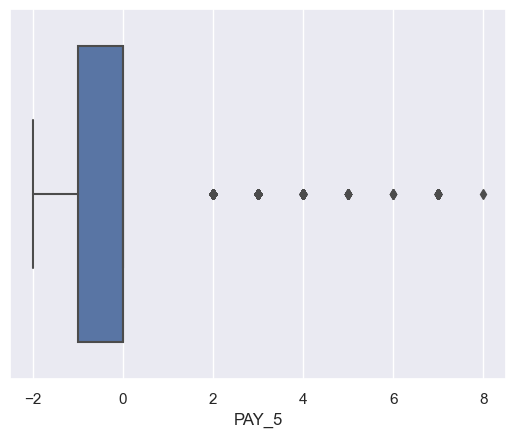

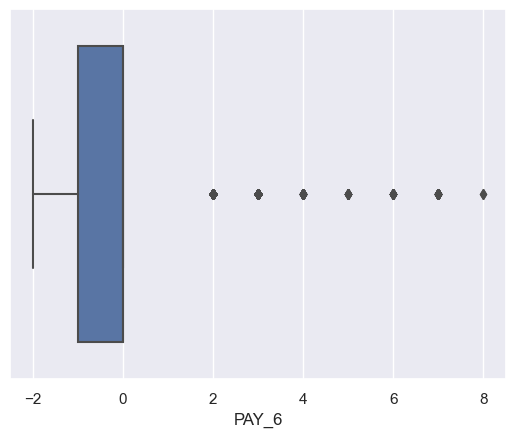

In [16]:
for i in data[[
    'LIMIT_BAL', 
    'PAY_0', 
    'PAY_2', 
    'PAY_3',
    'PAY_4', 
    'PAY_5', 
    'PAY_6']]:
    
    sns.boxplot(x=data[i], data=data)
    plt.show()

In [17]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1
Lower=q1-1.5*IQR
Upper=q3+1.5*IQR

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8824\2761603899.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1=data.quantile(0.25)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8824\2761603899.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3=data.quantile(0.75)


In [18]:
for i in data[[
    'LIMIT_BAL', 
    'PAY_0', 
    'PAY_2', 
    'PAY_3',
    'PAY_4', 
    'PAY_5', 
    'PAY_6']]:
    
    
    data[i] = np.where(data[i] > Upper[i], Upper[i],data[i])
    data[i] = np.where(data[i] < Lower[i], Lower[i],data[i])

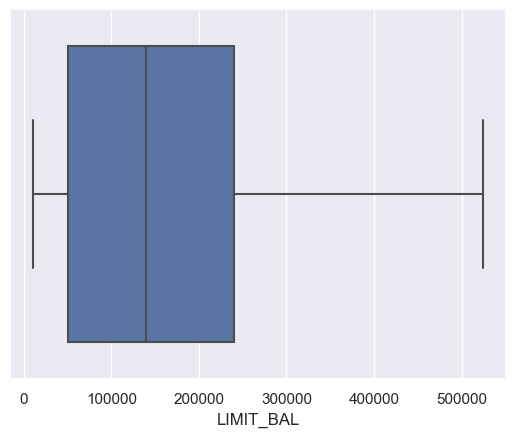

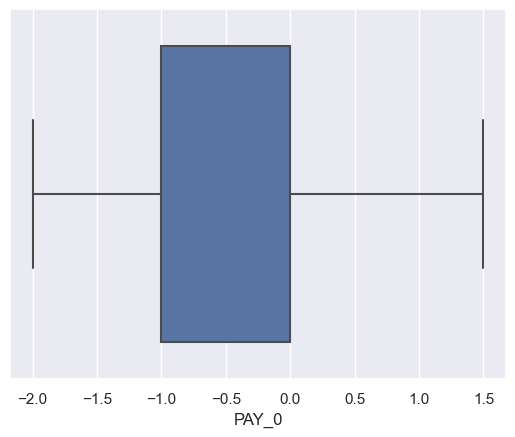

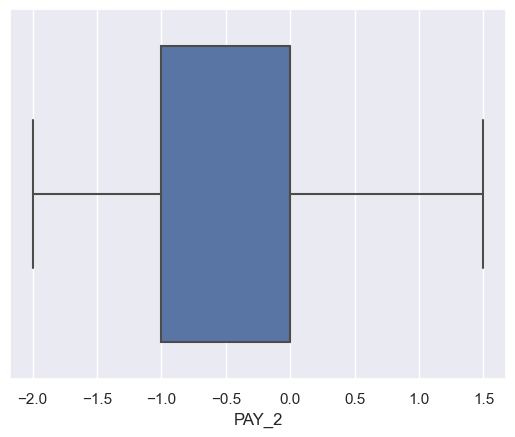

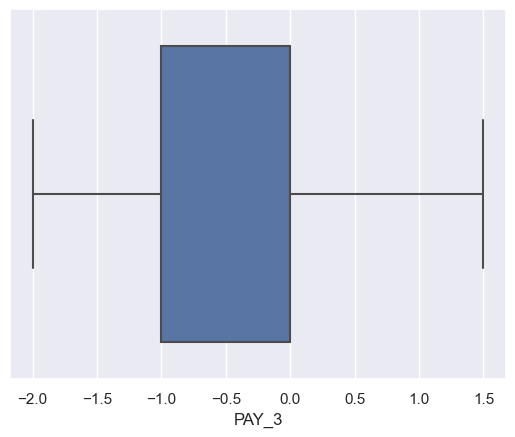

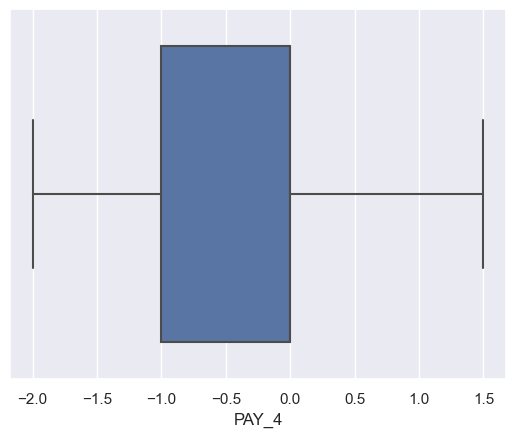

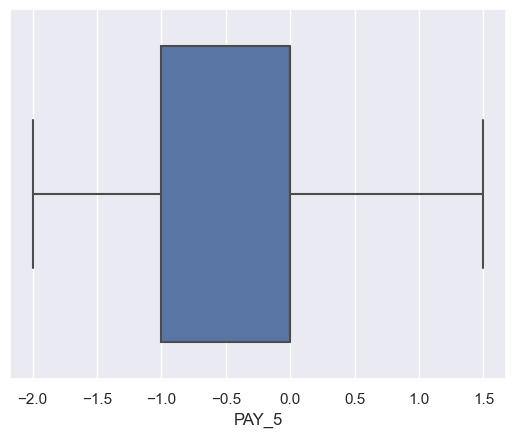

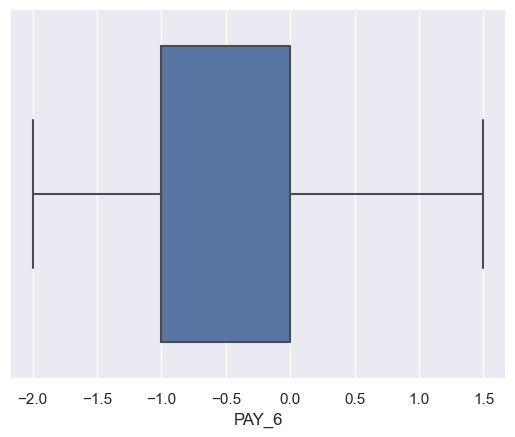

In [19]:
for i in data[[
    'LIMIT_BAL', 
    'PAY_0', 
    'PAY_2', 
    'PAY_3',
    'PAY_4', 
    'PAY_5', 
    'PAY_6']]:
    
    sns.boxplot(x=data[i], data=data)
    plt.show()

In [20]:
data=data.reset_index(drop=True)

In [21]:
data.describe(include='all')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default
count,30000.000000,30000,30000,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,2,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,female,university,single,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,18112,14030,15964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,166967.489333,NaN,NaN,NaN,-0.094033,-0.232367,-0.259683,-0.303967,-0.339300,-0.363717,0.221200
std,128013.394323,NaN,NaN,NaN,0.951983,0.991794,0.995493,0.969589,0.947772,0.970910,0.415062
min,10000.000000,NaN,NaN,NaN,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000
25%,50000.000000,NaN,NaN,NaN,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,140000.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## WOE Transformation for Logistic Regression

In [22]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default
0,20000.0,female,university,married,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1
1,120000.0,female,university,single,-1.0,1.5,0.0,0.0,0.0,1.5,1
2,90000.0,female,university,single,0.0,0.0,0.0,0.0,0.0,0.0,0
3,50000.0,female,university,married,0.0,0.0,0.0,0.0,0.0,0.0,0
4,50000.0,male,university,married,-1.0,0.0,-1.0,0.0,0.0,0.0,0


In [23]:
new_data=data.copy()

In [24]:
new_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default
0,20000.0,female,university,married,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1
1,120000.0,female,university,single,-1.0,1.5,0.0,0.0,0.0,1.5,1
2,90000.0,female,university,single,0.0,0.0,0.0,0.0,0.0,0.0,0
3,50000.0,female,university,married,0.0,0.0,0.0,0.0,0.0,0.0,0
4,50000.0,male,university,married,-1.0,0.0,-1.0,0.0,0.0,0.0,0


In [25]:
grouped=new_data.groupby(['SEX', 'default'])['default'].count().unstack().reset_index()
grouped

default,SEX,0,1
0,female,14349,3763
1,male,9015,2873


In [26]:
grouped['positive prop']=grouped[0]/grouped[0].sum()
grouped['negative prop']=grouped[1]/grouped[1].sum()
grouped['SEX_woe']=np.log(grouped['positive prop']/grouped['negative prop'])
grouped

default,SEX,0,1,positive prop,negative prop,SEX_woe
0,female,14349,3763,0.61415,0.567058,0.079777
1,male,9015,2873,0.38585,0.432942,-0.115154


In [27]:
new_data=new_data.merge(grouped[['SEX', 'SEX_woe']], how='left', on='SEX')
new_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,SEX_woe
0,20000.0,female,university,married,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1,0.079777
1,120000.0,female,university,single,-1.0,1.5,0.0,0.0,0.0,1.5,1,0.079777
2,90000.0,female,university,single,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777
3,50000.0,female,university,married,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777
4,50000.0,male,university,married,-1.0,0.0,-1.0,0.0,0.0,0.0,0,-0.115154
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,male,high school,married,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.115154
29996,150000.0,male,high school,single,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0,-0.115154
29997,30000.0,male,university,single,1.5,1.5,1.5,-1.0,0.0,0.0,1,-0.115154
29998,80000.0,male,high school,married,1.0,-1.0,0.0,0.0,0.0,-1.0,1,-0.115154


In [28]:
grouped=new_data.groupby(['EDUCATION', 'default'])['default'].count().unstack().reset_index()
grouped

default,EDUCATION,0,1
0,graduate school,8549.0,2036.0
1,high school,3680.0,1237.0
2,not educated,14.0,NaN
3,others,421.0,33.0
4,university,10700.0,3330.0


In [29]:
grouped['positive prop']=grouped[0]/grouped[0].sum()
grouped['negative prop']=grouped[1]/grouped[1].sum()
grouped['EDUCATION_woe']=np.log(grouped['positive prop']/grouped['negative prop'])
grouped

default,EDUCATION,0,1,positive prop,negative prop,EDUCATION_woe
0,graduate school,8549.0,2036.0,0.365905,0.306811,0.176140
1,high school,3680.0,1237.0,0.157507,0.186407,-0.168463
2,not educated,14.0,NaN,0.000599,NaN,NaN
3,others,421.0,33.0,0.018019,0.004973,1.287438
4,university,10700.0,3330.0,0.457970,0.501808,-0.091416


In [30]:
new_data=new_data.merge(grouped[['EDUCATION', 'EDUCATION_woe']], how='left', on='EDUCATION')
new_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,SEX_woe,EDUCATION_woe
0,20000.0,female,university,married,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1,0.079777,-0.091416
1,120000.0,female,university,single,-1.0,1.5,0.0,0.0,0.0,1.5,1,0.079777,-0.091416
2,90000.0,female,university,single,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416
3,50000.0,female,university,married,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416
4,50000.0,male,university,married,-1.0,0.0,-1.0,0.0,0.0,0.0,0,-0.115154,-0.091416
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,male,high school,married,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.115154,-0.168463
29996,150000.0,male,high school,single,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0,-0.115154,-0.168463
29997,30000.0,male,university,single,1.5,1.5,1.5,-1.0,0.0,0.0,1,-0.115154,-0.091416
29998,80000.0,male,high school,married,1.0,-1.0,0.0,0.0,0.0,-1.0,1,-0.115154,-0.168463


In [31]:
grouped=new_data.groupby(['MARRIAGE', 'default'])['default'].count().unstack().reset_index()
grouped

default,MARRIAGE,0,1
0,married,10453,3206
1,others,288,89
2,single,12623,3341


In [32]:
grouped['positive prop']=grouped[0]/grouped[0].sum()
grouped['negative prop']=grouped[1]/grouped[1].sum()
grouped['MARRIAGE_woe']=np.log(grouped['positive prop']/grouped['negative prop'])
grouped

default,MARRIAGE,0,1,positive prop,negative prop,MARRIAGE_woe
0,married,10453,3206,0.447398,0.483122,-0.076822
1,others,288,89,0.012327,0.013412,-0.084363
2,single,12623,3341,0.540276,0.503466,0.070563


In [33]:
new_data=new_data.merge(grouped[['MARRIAGE', 'MARRIAGE_woe']], how='left', on='MARRIAGE')
new_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,SEX_woe,EDUCATION_woe,MARRIAGE_woe
0,20000.0,female,university,married,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1,0.079777,-0.091416,-0.076822
1,120000.0,female,university,single,-1.0,1.5,0.0,0.0,0.0,1.5,1,0.079777,-0.091416,0.070563
2,90000.0,female,university,single,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,0.070563
3,50000.0,female,university,married,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,-0.076822
4,50000.0,male,university,married,-1.0,0.0,-1.0,0.0,0.0,0.0,0,-0.115154,-0.091416,-0.076822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,male,high school,married,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.115154,-0.168463,-0.076822
29996,150000.0,male,high school,single,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0,-0.115154,-0.168463,0.070563
29997,30000.0,male,university,single,1.5,1.5,1.5,-1.0,0.0,0.0,1,-0.115154,-0.091416,0.070563
29998,80000.0,male,high school,married,1.0,-1.0,0.0,0.0,0.0,-1.0,1,-0.115154,-0.168463,-0.076822


In [34]:
ranges=[-np.inf, new_data['LIMIT_BAL'].quantile(0.25), new_data['LIMIT_BAL'].quantile(0.5), new_data['LIMIT_BAL'].quantile(0.75), np.inf]
new_data['LIMIT_BAL_category']=pd.cut(new_data['LIMIT_BAL'], bins=ranges)
new_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,SEX_woe,EDUCATION_woe,MARRIAGE_woe,LIMIT_BAL_category
0,20000.0,female,university,married,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]"
1,120000.0,female,university,single,-1.0,1.5,0.0,0.0,0.0,1.5,1,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]"
2,90000.0,female,university,single,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]"
3,50000.0,female,university,married,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]"
4,50000.0,male,university,married,-1.0,0.0,-1.0,0.0,0.0,0.0,0,-0.115154,-0.091416,-0.076822,"(-inf, 50000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,male,high school,married,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.115154,-0.168463,-0.076822,"(140000.0, 240000.0]"
29996,150000.0,male,high school,single,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0,-0.115154,-0.168463,0.070563,"(140000.0, 240000.0]"
29997,30000.0,male,university,single,1.5,1.5,1.5,-1.0,0.0,0.0,1,-0.115154,-0.091416,0.070563,"(-inf, 50000.0]"
29998,80000.0,male,high school,married,1.0,-1.0,0.0,0.0,0.0,-1.0,1,-0.115154,-0.168463,-0.076822,"(50000.0, 140000.0]"


In [35]:
grouped=new_data.groupby(['LIMIT_BAL_category', 'default'])['default'].count().unstack().reset_index()
grouped

default,LIMIT_BAL_category,0,1
0,"(-inf, 50000.0]",5236,2440
1,"(50000.0, 140000.0]",5732,1882
2,"(140000.0, 240000.0]",6317,1326
3,"(240000.0, inf]",6079,988


In [36]:
grouped['positive prop']=grouped[0]/grouped[0].sum()
grouped['negative prop']=grouped[1]/grouped[1].sum()
grouped['LIMIT_BAL_woe']=np.log(grouped['positive prop']/grouped['negative prop'])
grouped

default,LIMIT_BAL_category,0,1,positive prop,negative prop,LIMIT_BAL_woe
0,"(-inf, 50000.0]",5236,2440,0.224105,0.367691,-0.495127
1,"(50000.0, 140000.0]",5732,1882,0.245335,0.283605,-0.144958
2,"(140000.0, 240000.0]",6317,1326,0.270373,0.199819,0.302391
3,"(240000.0, inf]",6079,988,0.260187,0.148885,0.558226


In [37]:
new_data=new_data.merge(grouped[['LIMIT_BAL_category', 'LIMIT_BAL_woe']], how='left', on='LIMIT_BAL_category')
new_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,SEX_woe,EDUCATION_woe,MARRIAGE_woe,LIMIT_BAL_category,LIMIT_BAL_woe
0,20000.0,female,university,married,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127
1,120000.0,female,university,single,-1.0,1.5,0.0,0.0,0.0,1.5,1,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]",-0.144958
2,90000.0,female,university,single,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]",-0.144958
3,50000.0,female,university,married,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127
4,50000.0,male,university,married,-1.0,0.0,-1.0,0.0,0.0,0.0,0,-0.115154,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,male,high school,married,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.115154,-0.168463,-0.076822,"(140000.0, 240000.0]",0.302391
29996,150000.0,male,high school,single,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0,-0.115154,-0.168463,0.070563,"(140000.0, 240000.0]",0.302391
29997,30000.0,male,university,single,1.5,1.5,1.5,-1.0,0.0,0.0,1,-0.115154,-0.091416,0.070563,"(-inf, 50000.0]",-0.495127
29998,80000.0,male,high school,married,1.0,-1.0,0.0,0.0,0.0,-1.0,1,-0.115154,-0.168463,-0.076822,"(50000.0, 140000.0]",-0.144958


In [38]:
ranges=[-np.inf, new_data['PAY_0'].quantile(0.25), new_data['PAY_0'].quantile(0.5), new_data['PAY_0'].quantile(0.75), np.inf]
new_data['PAY_0_category']=pd.cut(new_data['PAY_0'], bins=ranges,  duplicates='drop') #Error message said that only unique values must be added, so, I dropped duplicates.
new_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,SEX_woe,EDUCATION_woe,MARRIAGE_woe,LIMIT_BAL_category,LIMIT_BAL_woe,PAY_0_category
0,20000.0,female,university,married,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(0.0, inf]"
1,120000.0,female,university,single,-1.0,1.5,0.0,0.0,0.0,1.5,1,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]",-0.144958,"(-inf, -1.0]"
2,90000.0,female,university,single,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]",-0.144958,"(-1.0, 0.0]"
3,50000.0,female,university,married,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(-1.0, 0.0]"
4,50000.0,male,university,married,-1.0,0.0,-1.0,0.0,0.0,0.0,0,-0.115154,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(-inf, -1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,male,high school,married,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.115154,-0.168463,-0.076822,"(140000.0, 240000.0]",0.302391,"(-1.0, 0.0]"
29996,150000.0,male,high school,single,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0,-0.115154,-0.168463,0.070563,"(140000.0, 240000.0]",0.302391,"(-inf, -1.0]"
29997,30000.0,male,university,single,1.5,1.5,1.5,-1.0,0.0,0.0,1,-0.115154,-0.091416,0.070563,"(-inf, 50000.0]",-0.495127,"(0.0, inf]"
29998,80000.0,male,high school,married,1.0,-1.0,0.0,0.0,0.0,-1.0,1,-0.115154,-0.168463,-0.076822,"(50000.0, 140000.0]",-0.144958,"(0.0, inf]"


In [39]:
grouped=new_data.groupby(['PAY_0_category', 'default'])['default'].count().unstack().reset_index()
grouped

default,PAY_0_category,0,1
0,"(-inf, -1.0]",7126,1319
1,"(-1.0, 0.0]",12849,1888
2,"(0.0, inf]",3389,3429


In [40]:
grouped['positive prop']=grouped[0]/grouped[0].sum()
grouped['negative prop']=grouped[1]/grouped[1].sum()
grouped['PAY_0_woe']=np.log(grouped['positive prop']/grouped['negative prop'])
grouped

default,PAY_0_category,0,1,positive prop,negative prop,PAY_0_woe
0,"(-inf, -1.0]",7126,1319,0.304999,0.198764,0.428189
1,"(-1.0, 0.0]",12849,1888,0.549949,0.284509,0.659061
2,"(0.0, inf]",3389,3429,0.145052,0.516727,-1.270421


In [41]:
new_data=new_data.merge(grouped[['PAY_0_category', 'PAY_0_woe']], how='left', on='PAY_0_category')
new_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,SEX_woe,EDUCATION_woe,MARRIAGE_woe,LIMIT_BAL_category,LIMIT_BAL_woe,PAY_0_category,PAY_0_woe
0,20000.0,female,university,married,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(0.0, inf]",-1.270421
1,120000.0,female,university,single,-1.0,1.5,0.0,0.0,0.0,1.5,1,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]",-0.144958,"(-inf, -1.0]",0.428189
2,90000.0,female,university,single,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]",-0.144958,"(-1.0, 0.0]",0.659061
3,50000.0,female,university,married,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(-1.0, 0.0]",0.659061
4,50000.0,male,university,married,-1.0,0.0,-1.0,0.0,0.0,0.0,0,-0.115154,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(-inf, -1.0]",0.428189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,male,high school,married,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.115154,-0.168463,-0.076822,"(140000.0, 240000.0]",0.302391,"(-1.0, 0.0]",0.659061
29996,150000.0,male,high school,single,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0,-0.115154,-0.168463,0.070563,"(140000.0, 240000.0]",0.302391,"(-inf, -1.0]",0.428189
29997,30000.0,male,university,single,1.5,1.5,1.5,-1.0,0.0,0.0,1,-0.115154,-0.091416,0.070563,"(-inf, 50000.0]",-0.495127,"(0.0, inf]",-1.270421
29998,80000.0,male,high school,married,1.0,-1.0,0.0,0.0,0.0,-1.0,1,-0.115154,-0.168463,-0.076822,"(50000.0, 140000.0]",-0.144958,"(0.0, inf]",-1.270421


In [42]:
ranges=[-np.inf, new_data['PAY_2'].quantile(0.25), new_data['PAY_2'].quantile(0.5), new_data['PAY_2'].quantile(0.75), np.inf]
new_data['PAY_2_category']=pd.cut(new_data['PAY_2'], bins=ranges, duplicates='drop') 
new_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,SEX_woe,EDUCATION_woe,MARRIAGE_woe,LIMIT_BAL_category,LIMIT_BAL_woe,PAY_0_category,PAY_0_woe,PAY_2_category
0,20000.0,female,university,married,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(0.0, inf]",-1.270421,"(0.0, inf]"
1,120000.0,female,university,single,-1.0,1.5,0.0,0.0,0.0,1.5,1,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]",-0.144958,"(-inf, -1.0]",0.428189,"(0.0, inf]"
2,90000.0,female,university,single,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]",-0.144958,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]"
3,50000.0,female,university,married,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]"
4,50000.0,male,university,married,-1.0,0.0,-1.0,0.0,0.0,0.0,0,-0.115154,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(-inf, -1.0]",0.428189,"(-1.0, 0.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,male,high school,married,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.115154,-0.168463,-0.076822,"(140000.0, 240000.0]",0.302391,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]"
29996,150000.0,male,high school,single,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0,-0.115154,-0.168463,0.070563,"(140000.0, 240000.0]",0.302391,"(-inf, -1.0]",0.428189,"(-inf, -1.0]"
29997,30000.0,male,university,single,1.5,1.5,1.5,-1.0,0.0,0.0,1,-0.115154,-0.091416,0.070563,"(-inf, 50000.0]",-0.495127,"(0.0, inf]",-1.270421,"(0.0, inf]"
29998,80000.0,male,high school,married,1.0,-1.0,0.0,0.0,0.0,-1.0,1,-0.115154,-0.168463,-0.076822,"(50000.0, 140000.0]",-0.144958,"(0.0, inf]",-1.270421,"(-inf, -1.0]"


In [43]:
grouped=new_data.groupby(['PAY_2_category', 'default'])['default'].count().unstack().reset_index()
grouped

default,PAY_2_category,0,1
0,"(-inf, -1.0]",8175,1657
1,"(-1.0, 0.0]",13227,2503
2,"(0.0, inf]",1962,2476


In [44]:
grouped['positive prop']=grouped[0]/grouped[0].sum()
grouped['negative prop']=grouped[1]/grouped[1].sum()
grouped['PAY_2_woe']=np.log(grouped['positive prop']/grouped['negative prop'])
grouped

default,PAY_2_category,0,1,positive prop,negative prop,PAY_2_woe
0,"(-inf, -1.0]",8175,1657,0.349897,0.249699,0.337385
1,"(-1.0, 0.0]",13227,2503,0.566127,0.377185,0.406083
2,"(0.0, inf]",1962,2476,0.083975,0.373116,-1.491367


In [45]:
new_data=new_data.merge(grouped[['PAY_2_category', 'PAY_2_woe']], how='left', on='PAY_2_category')
new_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,SEX_woe,EDUCATION_woe,MARRIAGE_woe,LIMIT_BAL_category,LIMIT_BAL_woe,PAY_0_category,PAY_0_woe,PAY_2_category,PAY_2_woe
0,20000.0,female,university,married,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(0.0, inf]",-1.270421,"(0.0, inf]",-1.491367
1,120000.0,female,university,single,-1.0,1.5,0.0,0.0,0.0,1.5,1,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]",-0.144958,"(-inf, -1.0]",0.428189,"(0.0, inf]",-1.491367
2,90000.0,female,university,single,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]",-0.144958,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083
3,50000.0,female,university,married,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083
4,50000.0,male,university,married,-1.0,0.0,-1.0,0.0,0.0,0.0,0,-0.115154,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(-inf, -1.0]",0.428189,"(-1.0, 0.0]",0.406083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,male,high school,married,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.115154,-0.168463,-0.076822,"(140000.0, 240000.0]",0.302391,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083
29996,150000.0,male,high school,single,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0,-0.115154,-0.168463,0.070563,"(140000.0, 240000.0]",0.302391,"(-inf, -1.0]",0.428189,"(-inf, -1.0]",0.337385
29997,30000.0,male,university,single,1.5,1.5,1.5,-1.0,0.0,0.0,1,-0.115154,-0.091416,0.070563,"(-inf, 50000.0]",-0.495127,"(0.0, inf]",-1.270421,"(0.0, inf]",-1.491367
29998,80000.0,male,high school,married,1.0,-1.0,0.0,0.0,0.0,-1.0,1,-0.115154,-0.168463,-0.076822,"(50000.0, 140000.0]",-0.144958,"(0.0, inf]",-1.270421,"(-inf, -1.0]",0.337385


In [46]:
ranges=[-np.inf, new_data['PAY_3'].quantile(0.25), new_data['PAY_3'].quantile(0.5), new_data['PAY_3'].quantile(0.75), np.inf]
new_data['PAY_3_category']=pd.cut(new_data['PAY_3'], bins=ranges, duplicates='drop') 
new_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,SEX_woe,EDUCATION_woe,MARRIAGE_woe,LIMIT_BAL_category,LIMIT_BAL_woe,PAY_0_category,PAY_0_woe,PAY_2_category,PAY_2_woe,PAY_3_category
0,20000.0,female,university,married,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(0.0, inf]",-1.270421,"(0.0, inf]",-1.491367,"(-inf, -1.0]"
1,120000.0,female,university,single,-1.0,1.5,0.0,0.0,0.0,1.5,1,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]",-0.144958,"(-inf, -1.0]",0.428189,"(0.0, inf]",-1.491367,"(-1.0, 0.0]"
2,90000.0,female,university,single,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]",-0.144958,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]"
3,50000.0,female,university,married,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]"
4,50000.0,male,university,married,-1.0,0.0,-1.0,0.0,0.0,0.0,0,-0.115154,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(-inf, -1.0]",0.428189,"(-1.0, 0.0]",0.406083,"(-inf, -1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,male,high school,married,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.115154,-0.168463,-0.076822,"(140000.0, 240000.0]",0.302391,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]"
29996,150000.0,male,high school,single,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0,-0.115154,-0.168463,0.070563,"(140000.0, 240000.0]",0.302391,"(-inf, -1.0]",0.428189,"(-inf, -1.0]",0.337385,"(-inf, -1.0]"
29997,30000.0,male,university,single,1.5,1.5,1.5,-1.0,0.0,0.0,1,-0.115154,-0.091416,0.070563,"(-inf, 50000.0]",-0.495127,"(0.0, inf]",-1.270421,"(0.0, inf]",-1.491367,"(0.0, inf]"
29998,80000.0,male,high school,married,1.0,-1.0,0.0,0.0,0.0,-1.0,1,-0.115154,-0.168463,-0.076822,"(50000.0, 140000.0]",-0.144958,"(0.0, inf]",-1.270421,"(-inf, -1.0]",0.337385,"(-1.0, 0.0]"


In [47]:
grouped=new_data.groupby(['PAY_3_category', 'default'])['default'].count().unstack().reset_index()
grouped

default,PAY_3_category,0,1
0,"(-inf, -1.0]",8340,1683
1,"(-1.0, 0.0]",13013,2751
2,"(0.0, inf]",2011,2202


In [48]:
grouped['positive prop']=grouped[0]/grouped[0].sum()
grouped['negative prop']=grouped[1]/grouped[1].sum()
grouped['PAY_3_woe']=np.log(grouped['positive prop']/grouped['negative prop'])
grouped

default,PAY_3_category,0,1,positive prop,negative prop,PAY_3_woe
0,"(-inf, -1.0]",8340,1683,0.356959,0.253617,0.341798
1,"(-1.0, 0.0]",13013,2751,0.556968,0.414557,0.295297
2,"(0.0, inf]",2011,2202,0.086073,0.331826,-1.349421


In [49]:
new_data=new_data.merge(grouped[['PAY_3_category', 'PAY_3_woe']], how='left', on='PAY_3_category')
new_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,SEX_woe,EDUCATION_woe,MARRIAGE_woe,LIMIT_BAL_category,LIMIT_BAL_woe,PAY_0_category,PAY_0_woe,PAY_2_category,PAY_2_woe,PAY_3_category,PAY_3_woe
0,20000.0,female,university,married,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(0.0, inf]",-1.270421,"(0.0, inf]",-1.491367,"(-inf, -1.0]",0.341798
1,120000.0,female,university,single,-1.0,1.5,0.0,0.0,0.0,1.5,1,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]",-0.144958,"(-inf, -1.0]",0.428189,"(0.0, inf]",-1.491367,"(-1.0, 0.0]",0.295297
2,90000.0,female,university,single,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]",-0.144958,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]",0.295297
3,50000.0,female,university,married,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]",0.295297
4,50000.0,male,university,married,-1.0,0.0,-1.0,0.0,0.0,0.0,0,-0.115154,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(-inf, -1.0]",0.428189,"(-1.0, 0.0]",0.406083,"(-inf, -1.0]",0.341798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,male,high school,married,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.115154,-0.168463,-0.076822,"(140000.0, 240000.0]",0.302391,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]",0.295297
29996,150000.0,male,high school,single,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0,-0.115154,-0.168463,0.070563,"(140000.0, 240000.0]",0.302391,"(-inf, -1.0]",0.428189,"(-inf, -1.0]",0.337385,"(-inf, -1.0]",0.341798
29997,30000.0,male,university,single,1.5,1.5,1.5,-1.0,0.0,0.0,1,-0.115154,-0.091416,0.070563,"(-inf, 50000.0]",-0.495127,"(0.0, inf]",-1.270421,"(0.0, inf]",-1.491367,"(0.0, inf]",-1.349421
29998,80000.0,male,high school,married,1.0,-1.0,0.0,0.0,0.0,-1.0,1,-0.115154,-0.168463,-0.076822,"(50000.0, 140000.0]",-0.144958,"(0.0, inf]",-1.270421,"(-inf, -1.0]",0.337385,"(-1.0, 0.0]",0.295297


In [50]:
ranges=[-np.inf, new_data['PAY_4'].quantile(0.25), new_data['PAY_4'].quantile(0.5), new_data['PAY_4'].quantile(0.75), np.inf]
new_data['PAY_4_category']=pd.cut(new_data['PAY_4'], bins=ranges, duplicates='drop') 
new_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,SEX_woe,EDUCATION_woe,MARRIAGE_woe,LIMIT_BAL_category,LIMIT_BAL_woe,PAY_0_category,PAY_0_woe,PAY_2_category,PAY_2_woe,PAY_3_category,PAY_3_woe,PAY_4_category
0,20000.0,female,university,married,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(0.0, inf]",-1.270421,"(0.0, inf]",-1.491367,"(-inf, -1.0]",0.341798,"(-inf, -1.0]"
1,120000.0,female,university,single,-1.0,1.5,0.0,0.0,0.0,1.5,1,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]",-0.144958,"(-inf, -1.0]",0.428189,"(0.0, inf]",-1.491367,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]"
2,90000.0,female,university,single,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]",-0.144958,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]"
3,50000.0,female,university,married,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]"
4,50000.0,male,university,married,-1.0,0.0,-1.0,0.0,0.0,0.0,0,-0.115154,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(-inf, -1.0]",0.428189,"(-1.0, 0.0]",0.406083,"(-inf, -1.0]",0.341798,"(-1.0, 0.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,male,high school,married,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.115154,-0.168463,-0.076822,"(140000.0, 240000.0]",0.302391,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]"
29996,150000.0,male,high school,single,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0,-0.115154,-0.168463,0.070563,"(140000.0, 240000.0]",0.302391,"(-inf, -1.0]",0.428189,"(-inf, -1.0]",0.337385,"(-inf, -1.0]",0.341798,"(-inf, -1.0]"
29997,30000.0,male,university,single,1.5,1.5,1.5,-1.0,0.0,0.0,1,-0.115154,-0.091416,0.070563,"(-inf, 50000.0]",-0.495127,"(0.0, inf]",-1.270421,"(0.0, inf]",-1.491367,"(0.0, inf]",-1.349421,"(-inf, -1.0]"
29998,80000.0,male,high school,married,1.0,-1.0,0.0,0.0,0.0,-1.0,1,-0.115154,-0.168463,-0.076822,"(50000.0, 140000.0]",-0.144958,"(0.0, inf]",-1.270421,"(-inf, -1.0]",0.337385,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]"


In [51]:
grouped=new_data.groupby(['PAY_4_category', 'default'])['default'].count().unstack().reset_index()
grouped

default,PAY_4_category,0,1
0,"(-inf, -1.0]",8294,1741
1,"(-1.0, 0.0]",13439,3016
2,"(0.0, inf]",1631,1879


In [52]:
grouped['positive prop']=grouped[0]/grouped[0].sum()
grouped['negative prop']=grouped[1]/grouped[1].sum()
grouped['PAY_4_woe']=np.log(grouped['positive prop']/grouped['negative prop'])
grouped

default,PAY_4_category,0,1,positive prop,negative prop,PAY_4_woe
0,"(-inf, -1.0]",8294,1741,0.354991,0.262357,0.302386
1,"(-1.0, 0.0]",13439,3016,0.575201,0.454491,0.235542
2,"(0.0, inf]",1631,1879,0.069808,0.283153,-1.400233


In [53]:
new_data=new_data.merge(grouped[['PAY_4_category', 'PAY_4_woe']], how='left', on='PAY_4_category')
new_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,SEX_woe,EDUCATION_woe,MARRIAGE_woe,LIMIT_BAL_category,LIMIT_BAL_woe,PAY_0_category,PAY_0_woe,PAY_2_category,PAY_2_woe,PAY_3_category,PAY_3_woe,PAY_4_category,PAY_4_woe
0,20000.0,female,university,married,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(0.0, inf]",-1.270421,"(0.0, inf]",-1.491367,"(-inf, -1.0]",0.341798,"(-inf, -1.0]",0.302386
1,120000.0,female,university,single,-1.0,1.5,0.0,0.0,0.0,1.5,1,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]",-0.144958,"(-inf, -1.0]",0.428189,"(0.0, inf]",-1.491367,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542
2,90000.0,female,university,single,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]",-0.144958,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542
3,50000.0,female,university,married,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542
4,50000.0,male,university,married,-1.0,0.0,-1.0,0.0,0.0,0.0,0,-0.115154,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(-inf, -1.0]",0.428189,"(-1.0, 0.0]",0.406083,"(-inf, -1.0]",0.341798,"(-1.0, 0.0]",0.235542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,male,high school,married,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.115154,-0.168463,-0.076822,"(140000.0, 240000.0]",0.302391,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542
29996,150000.0,male,high school,single,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0,-0.115154,-0.168463,0.070563,"(140000.0, 240000.0]",0.302391,"(-inf, -1.0]",0.428189,"(-inf, -1.0]",0.337385,"(-inf, -1.0]",0.341798,"(-inf, -1.0]",0.302386
29997,30000.0,male,university,single,1.5,1.5,1.5,-1.0,0.0,0.0,1,-0.115154,-0.091416,0.070563,"(-inf, 50000.0]",-0.495127,"(0.0, inf]",-1.270421,"(0.0, inf]",-1.491367,"(0.0, inf]",-1.349421,"(-inf, -1.0]",0.302386
29998,80000.0,male,high school,married,1.0,-1.0,0.0,0.0,0.0,-1.0,1,-0.115154,-0.168463,-0.076822,"(50000.0, 140000.0]",-0.144958,"(0.0, inf]",-1.270421,"(-inf, -1.0]",0.337385,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542


In [54]:
ranges=[-np.inf, new_data['PAY_5'].quantile(0.25), new_data['PAY_5'].quantile(0.5), new_data['PAY_5'].quantile(0.75), np.inf]
new_data['PAY_5_category']=pd.cut(new_data['PAY_5'], bins=ranges, duplicates='drop') 
new_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,SEX_woe,EDUCATION_woe,MARRIAGE_woe,LIMIT_BAL_category,LIMIT_BAL_woe,PAY_0_category,PAY_0_woe,PAY_2_category,PAY_2_woe,PAY_3_category,PAY_3_woe,PAY_4_category,PAY_4_woe,PAY_5_category
0,20000.0,female,university,married,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(0.0, inf]",-1.270421,"(0.0, inf]",-1.491367,"(-inf, -1.0]",0.341798,"(-inf, -1.0]",0.302386,"(-inf, -1.0]"
1,120000.0,female,university,single,-1.0,1.5,0.0,0.0,0.0,1.5,1,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]",-0.144958,"(-inf, -1.0]",0.428189,"(0.0, inf]",-1.491367,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]"
2,90000.0,female,university,single,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]",-0.144958,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]"
3,50000.0,female,university,married,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]"
4,50000.0,male,university,married,-1.0,0.0,-1.0,0.0,0.0,0.0,0,-0.115154,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(-inf, -1.0]",0.428189,"(-1.0, 0.0]",0.406083,"(-inf, -1.0]",0.341798,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,male,high school,married,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.115154,-0.168463,-0.076822,"(140000.0, 240000.0]",0.302391,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]"
29996,150000.0,male,high school,single,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0,-0.115154,-0.168463,0.070563,"(140000.0, 240000.0]",0.302391,"(-inf, -1.0]",0.428189,"(-inf, -1.0]",0.337385,"(-inf, -1.0]",0.341798,"(-inf, -1.0]",0.302386,"(-1.0, 0.0]"
29997,30000.0,male,university,single,1.5,1.5,1.5,-1.0,0.0,0.0,1,-0.115154,-0.091416,0.070563,"(-inf, 50000.0]",-0.495127,"(0.0, inf]",-1.270421,"(0.0, inf]",-1.491367,"(0.0, inf]",-1.349421,"(-inf, -1.0]",0.302386,"(-1.0, 0.0]"
29998,80000.0,male,high school,married,1.0,-1.0,0.0,0.0,0.0,-1.0,1,-0.115154,-0.168463,-0.076822,"(50000.0, 140000.0]",-0.144958,"(0.0, inf]",-1.270421,"(-inf, -1.0]",0.337385,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]"


In [55]:
grouped=new_data.groupby(['PAY_5_category', 'default'])['default'].count().unstack().reset_index()
grouped

default,PAY_5_category,0,1
0,"(-inf, -1.0]",8293,1792
1,"(-1.0, 0.0]",13752,3195
2,"(0.0, inf]",1319,1649


In [56]:
grouped['positive prop']=grouped[0]/grouped[0].sum()
grouped['negative prop']=grouped[1]/grouped[1].sum()
grouped['PAY_5_woe']=np.log(grouped['positive prop']/grouped['negative prop'])
grouped

default,PAY_5_category,0,1,positive prop,negative prop,PAY_5_woe
0,"(-inf, -1.0]",8293,1792,0.354948,0.270042,0.273392
1,"(-1.0, 0.0]",13752,3195,0.588598,0.481465,0.200910
2,"(0.0, inf]",1319,1649,0.056454,0.248493,-1.481982


In [57]:
new_data=new_data.merge(grouped[['PAY_5_category', 'PAY_5_woe']], how='left', on='PAY_5_category')
new_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,SEX_woe,EDUCATION_woe,MARRIAGE_woe,LIMIT_BAL_category,LIMIT_BAL_woe,PAY_0_category,PAY_0_woe,PAY_2_category,PAY_2_woe,PAY_3_category,PAY_3_woe,PAY_4_category,PAY_4_woe,PAY_5_category,PAY_5_woe
0,20000.0,female,university,married,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(0.0, inf]",-1.270421,"(0.0, inf]",-1.491367,"(-inf, -1.0]",0.341798,"(-inf, -1.0]",0.302386,"(-inf, -1.0]",0.273392
1,120000.0,female,university,single,-1.0,1.5,0.0,0.0,0.0,1.5,1,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]",-0.144958,"(-inf, -1.0]",0.428189,"(0.0, inf]",-1.491367,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910
2,90000.0,female,university,single,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]",-0.144958,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910
3,50000.0,female,university,married,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910
4,50000.0,male,university,married,-1.0,0.0,-1.0,0.0,0.0,0.0,0,-0.115154,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(-inf, -1.0]",0.428189,"(-1.0, 0.0]",0.406083,"(-inf, -1.0]",0.341798,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,male,high school,married,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.115154,-0.168463,-0.076822,"(140000.0, 240000.0]",0.302391,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910
29996,150000.0,male,high school,single,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0,-0.115154,-0.168463,0.070563,"(140000.0, 240000.0]",0.302391,"(-inf, -1.0]",0.428189,"(-inf, -1.0]",0.337385,"(-inf, -1.0]",0.341798,"(-inf, -1.0]",0.302386,"(-1.0, 0.0]",0.200910
29997,30000.0,male,university,single,1.5,1.5,1.5,-1.0,0.0,0.0,1,-0.115154,-0.091416,0.070563,"(-inf, 50000.0]",-0.495127,"(0.0, inf]",-1.270421,"(0.0, inf]",-1.491367,"(0.0, inf]",-1.349421,"(-inf, -1.0]",0.302386,"(-1.0, 0.0]",0.200910
29998,80000.0,male,high school,married,1.0,-1.0,0.0,0.0,0.0,-1.0,1,-0.115154,-0.168463,-0.076822,"(50000.0, 140000.0]",-0.144958,"(0.0, inf]",-1.270421,"(-inf, -1.0]",0.337385,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910


In [58]:
ranges=[-np.inf, new_data['PAY_6'].quantile(0.25), new_data['PAY_6'].quantile(0.5), new_data['PAY_6'].quantile(0.75), np.inf]
new_data['PAY_6_category']=pd.cut(new_data['PAY_6'], bins=ranges, duplicates='drop') 
new_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,SEX_woe,EDUCATION_woe,MARRIAGE_woe,LIMIT_BAL_category,LIMIT_BAL_woe,PAY_0_category,PAY_0_woe,PAY_2_category,PAY_2_woe,PAY_3_category,PAY_3_woe,PAY_4_category,PAY_4_woe,PAY_5_category,PAY_5_woe,PAY_6_category
0,20000.0,female,university,married,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(0.0, inf]",-1.270421,"(0.0, inf]",-1.491367,"(-inf, -1.0]",0.341798,"(-inf, -1.0]",0.302386,"(-inf, -1.0]",0.273392,"(-inf, -1.0]"
1,120000.0,female,university,single,-1.0,1.5,0.0,0.0,0.0,1.5,1,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]",-0.144958,"(-inf, -1.0]",0.428189,"(0.0, inf]",-1.491367,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910,"(0.0, inf]"
2,90000.0,female,university,single,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]",-0.144958,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910,"(-1.0, 0.0]"
3,50000.0,female,university,married,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910,"(-1.0, 0.0]"
4,50000.0,male,university,married,-1.0,0.0,-1.0,0.0,0.0,0.0,0,-0.115154,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(-inf, -1.0]",0.428189,"(-1.0, 0.0]",0.406083,"(-inf, -1.0]",0.341798,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910,"(-1.0, 0.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,male,high school,married,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.115154,-0.168463,-0.076822,"(140000.0, 240000.0]",0.302391,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910,"(-1.0, 0.0]"
29996,150000.0,male,high school,single,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0,-0.115154,-0.168463,0.070563,"(140000.0, 240000.0]",0.302391,"(-inf, -1.0]",0.428189,"(-inf, -1.0]",0.337385,"(-inf, -1.0]",0.341798,"(-inf, -1.0]",0.302386,"(-1.0, 0.0]",0.200910,"(-1.0, 0.0]"
29997,30000.0,male,university,single,1.5,1.5,1.5,-1.0,0.0,0.0,1,-0.115154,-0.091416,0.070563,"(-inf, 50000.0]",-0.495127,"(0.0, inf]",-1.270421,"(0.0, inf]",-1.491367,"(0.0, inf]",-1.349421,"(-inf, -1.0]",0.302386,"(-1.0, 0.0]",0.200910,"(-1.0, 0.0]"
29998,80000.0,male,high school,married,1.0,-1.0,0.0,0.0,0.0,-1.0,1,-0.115154,-0.168463,-0.076822,"(50000.0, 140000.0]",-0.144958,"(0.0, inf]",-1.270421,"(-inf, -1.0]",0.337385,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910,"(-inf, -1.0]"


In [59]:
grouped=new_data.groupby(['PAY_6_category', 'default'])['default'].count().unstack().reset_index()
grouped

default,PAY_6_category,0,1
0,"(-inf, -1.0]",8679,1956
1,"(-1.0, 0.0]",13217,3069
2,"(0.0, inf]",1468,1611


In [60]:
grouped['positive prop']=grouped[0]/grouped[0].sum()
grouped['negative prop']=grouped[1]/grouped[1].sum()
grouped['PAY_6_woe']=np.log(grouped['positive prop']/grouped['negative prop'])
grouped

default,PAY_6_category,0,1,positive prop,negative prop,PAY_6_woe
0,"(-inf, -1.0]",8679,1956,0.371469,0.294756,0.231318
1,"(-1.0, 0.0]",13217,3069,0.565699,0.462477,0.201465
2,"(0.0, inf]",1468,1611,0.062832,0.242767,-1.351641


In [61]:
new_data=new_data.merge(grouped[['PAY_6_category', 'PAY_6_woe']], how='left', on='PAY_6_category')
new_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,SEX_woe,EDUCATION_woe,MARRIAGE_woe,LIMIT_BAL_category,LIMIT_BAL_woe,PAY_0_category,PAY_0_woe,PAY_2_category,PAY_2_woe,PAY_3_category,PAY_3_woe,PAY_4_category,PAY_4_woe,PAY_5_category,PAY_5_woe,PAY_6_category,PAY_6_woe
0,20000.0,female,university,married,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(0.0, inf]",-1.270421,"(0.0, inf]",-1.491367,"(-inf, -1.0]",0.341798,"(-inf, -1.0]",0.302386,"(-inf, -1.0]",0.273392,"(-inf, -1.0]",0.231318
1,120000.0,female,university,single,-1.0,1.5,0.0,0.0,0.0,1.5,1,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]",-0.144958,"(-inf, -1.0]",0.428189,"(0.0, inf]",-1.491367,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910,"(0.0, inf]",-1.351641
2,90000.0,female,university,single,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,0.070563,"(50000.0, 140000.0]",-0.144958,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910,"(-1.0, 0.0]",0.201465
3,50000.0,female,university,married,0.0,0.0,0.0,0.0,0.0,0.0,0,0.079777,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910,"(-1.0, 0.0]",0.201465
4,50000.0,male,university,married,-1.0,0.0,-1.0,0.0,0.0,0.0,0,-0.115154,-0.091416,-0.076822,"(-inf, 50000.0]",-0.495127,"(-inf, -1.0]",0.428189,"(-1.0, 0.0]",0.406083,"(-inf, -1.0]",0.341798,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910,"(-1.0, 0.0]",0.201465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,male,high school,married,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.115154,-0.168463,-0.076822,"(140000.0, 240000.0]",0.302391,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910,"(-1.0, 0.0]",0.201465
29996,150000.0,male,high school,single,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0,-0.115154,-0.168463,0.070563,"(140000.0, 240000.0]",0.302391,"(-inf, -1.0]",0.428189,"(-inf, -1.0]",0.337385,"(-inf, -1.0]",0.341798,"(-inf, -1.0]",0.302386,"(-1.0, 0.0]",0.200910,"(-1.0, 0.0]",0.201465
29997,30000.0,male,university,single,1.5,1.5,1.5,-1.0,0.0,0.0,1,-0.115154,-0.091416,0.070563,"(-inf, 50000.0]",-0.495127,"(0.0, inf]",-1.270421,"(0.0, inf]",-1.491367,"(0.0, inf]",-1.349421,"(-inf, -1.0]",0.302386,"(-1.0, 0.0]",0.200910,"(-1.0, 0.0]",0.201465
29998,80000.0,male,high school,married,1.0,-1.0,0.0,0.0,0.0,-1.0,1,-0.115154,-0.168463,-0.076822,"(50000.0, 140000.0]",-0.144958,"(0.0, inf]",-1.270421,"(-inf, -1.0]",0.337385,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910,"(-inf, -1.0]",0.231318


In [62]:
new_data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'default', 'SEX_woe', 'EDUCATION_woe',
       'MARRIAGE_woe', 'LIMIT_BAL_category', 'LIMIT_BAL_woe', 'PAY_0_category',
       'PAY_0_woe', 'PAY_2_category', 'PAY_2_woe', 'PAY_3_category',
       'PAY_3_woe', 'PAY_4_category', 'PAY_4_woe', 'PAY_5_category',
       'PAY_5_woe', 'PAY_6_category', 'PAY_6_woe'],
      dtype='object')

In [63]:
woe_data=new_data[[
    'SEX_woe',
    'EDUCATION_woe',
    'MARRIAGE_woe', 
    'LIMIT_BAL_woe',
    'PAY_0_woe',
    'PAY_2_woe',
    'PAY_3_woe',
    'PAY_4_woe',
    'PAY_5_woe',
    'PAY_6_woe',
    'default'
]]

In [64]:
woe_data

,SEX_woe,EDUCATION_woe,MARRIAGE_woe,LIMIT_BAL_woe,PAY_0_woe,PAY_2_woe,PAY_3_woe,PAY_4_woe,PAY_5_woe,PAY_6_woe,default
0,0.079777,-0.091416,-0.076822,-0.495127,-1.270421,-1.491367,0.341798,0.302386,0.273392,0.231318,1
1,0.079777,-0.091416,0.070563,-0.144958,0.428189,-1.491367,0.295297,0.235542,0.200910,-1.351641,1
2,0.079777,-0.091416,0.070563,-0.144958,0.659061,0.406083,0.295297,0.235542,0.200910,0.201465,0
3,0.079777,-0.091416,-0.076822,-0.495127,0.659061,0.406083,0.295297,0.235542,0.200910,0.201465,0
4,-0.115154,-0.091416,-0.076822,-0.495127,0.428189,0.406083,0.341798,0.235542,0.200910,0.201465,0
...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.115154,-0.168463,-0.076822,0.302391,0.659061,0.406083,0.295297,0.235542,0.200910,0.201465,0
29996,-0.115154,-0.168463,0.070563,0.302391,0.428189,0.337385,0.341798,0.302386,0.200910,0.201465,0
29997,-0.115154,-0.091416,0.070563,-0.495127,-1.270421,-1.491367,-1.349421,0.302386,0.200910,0.201465,1
29998,-0.115154,-0.168463,-0.076822,-0.144958,-1.270421,0.337385,0.295297,0.235542,0.200910,0.231318,1


In [65]:
woe_data.isnull().sum()

SEX_woe           0
EDUCATION_woe    14
MARRIAGE_woe      0
LIMIT_BAL_woe     0
PAY_0_woe         0
PAY_2_woe         0
PAY_3_woe         0
PAY_4_woe         0
PAY_5_woe         0
PAY_6_woe         0
default           0
dtype: int64

In [66]:
woe_data['EDUCATION_woe']=woe_data['EDUCATION_woe'].fillna(value=woe_data['EDUCATION_woe'].mean())

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8824\2744570511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  woe_data['EDUCATION_woe']=woe_data['EDUCATION_woe'].fillna(value=woe_data['EDUCATION_woe'].mean())


In [67]:
woe_data.isnull().sum()

SEX_woe          0
EDUCATION_woe    0
MARRIAGE_woe     0
LIMIT_BAL_woe    0
PAY_0_woe        0
PAY_2_woe        0
PAY_3_woe        0
PAY_4_woe        0
PAY_5_woe        0
PAY_6_woe        0
default          0
dtype: int64

In [68]:
woe_data.shape

(30000, 11)

## Modeling

In [69]:
X=woe_data.drop('default', axis=1)
y=woe_data['default']

In [70]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

In [71]:
def evaluate(model, X_test, y_test):
    
    y_pred_test = model.predict(X_test)
    y_prob_test = model.predict_proba(X_test)[:,1]
    
    roc_score_test = roc_auc_score(y_test, y_prob_test)
    gini_score_test= roc_score_test*2-1
    
    y_pred_train = model.predict(X_train)
    y_prob_train = model.predict_proba(X_train)[:,1]
    
    roc_score_train = roc_auc_score(y_train, y_prob_train)
    gini_score_train = roc_score_train*2-1
    
    confusion_matrix=metrics.confusion_matrix(y_test, y_pred_test)
    report=classification_report(y_test, y_pred_test)
    
    print('Model Performance')

    print('Gini Score for Test:', gini_score_test*100)
    
    print('Gini Score for Train:', gini_score_train*100)
    
    print('Confusion Matrix', confusion_matrix)
    
    print('Classification report', report)

In [72]:
lr=LogisticRegression()

In [73]:
lr.fit(X_train, y_train)

LogisticRegression()

In [74]:
result_lr=evaluate(lr, X_test, y_test)

Model Performance
Gini Score for Test: 50.32137472170679
Gini Score for Train: 51.23244739861188
Confusion Matrix [[4468  219]
 [ 934  379]]
Classification report               precision    recall  f1-score   support

           0       0.83      0.95      0.89      4687
           1       0.63      0.29      0.40      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.62      0.64      6000
weighted avg       0.78      0.81      0.78      6000



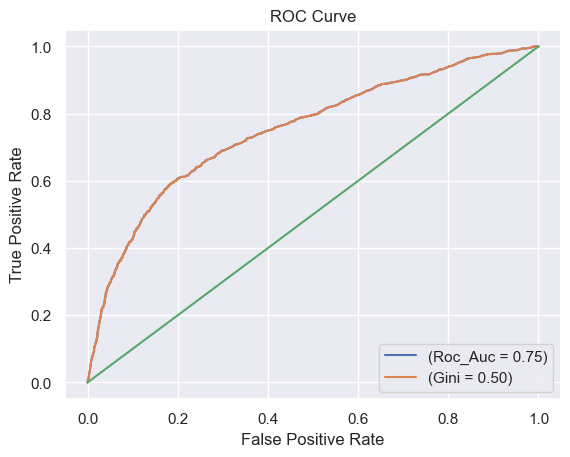

In [75]:
y_prob = lr.predict_proba(X_test)[:, 1]

roc_prob= roc_auc_score(y_test, y_prob)
gini = 2*roc_prob-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_prob)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

In [76]:
lr_balanced=LogisticRegression(class_weight='balanced')
lr_balanced.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [77]:
result_lr_balanced=evaluate(lr_balanced, X_test, y_test)

Model Performance
Gini Score for Test: 50.286308275015166
Gini Score for Train: 51.270899315273624
Confusion Matrix [[3822  865]
 [ 534  779]]
Classification report               precision    recall  f1-score   support

           0       0.88      0.82      0.85      4687
           1       0.47      0.59      0.53      1313

    accuracy                           0.77      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.77      0.78      6000



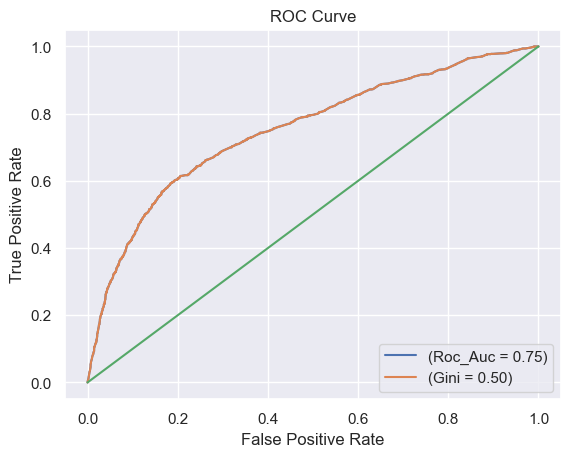

In [78]:
y_prob = lr_balanced.predict_proba(X_test)[:, 1]

roc_prob= roc_auc_score(y_test, y_prob)
gini = 2*roc_prob-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_prob)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

## Modeling for other ML algorithms

In [79]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default
0,20000.0,female,university,married,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1
1,120000.0,female,university,single,-1.0,1.5,0.0,0.0,0.0,1.5,1
2,90000.0,female,university,single,0.0,0.0,0.0,0.0,0.0,0.0,0
3,50000.0,female,university,married,0.0,0.0,0.0,0.0,0.0,0.0,0
4,50000.0,male,university,married,-1.0,0.0,-1.0,0.0,0.0,0.0,0


In [80]:
data_dummied=pd.get_dummies(data, drop_first=True)

In [81]:
data_dummied

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,SEX_male,EDUCATION_high school,EDUCATION_not educated,EDUCATION_others,EDUCATION_university,MARRIAGE_others,MARRIAGE_single
0,20000.0,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1,0,0,0,0,1,0,0
1,120000.0,-1.0,1.5,0.0,0.0,0.0,1.5,1,0,0,0,0,1,0,1
2,90000.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,1
3,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0
4,50000.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0
29996,150000.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0,1,1,0,0,0,0,1
29997,30000.0,1.5,1.5,1.5,-1.0,0.0,0.0,1,1,0,0,0,1,0,1
29998,80000.0,1.0,-1.0,0.0,0.0,0.0,-1.0,1,1,1,0,0,0,0,0


In [82]:
data_dummied.columns

Index(['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'default', 'SEX_male', 'EDUCATION_high school',
       'EDUCATION_not educated', 'EDUCATION_others', 'EDUCATION_university',
       'MARRIAGE_others', 'MARRIAGE_single'],
      dtype='object')

In [83]:
data_dummied=data_dummied[['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'SEX_male', 'EDUCATION_high school',
       'EDUCATION_not educated', 'EDUCATION_others', 'EDUCATION_university',
       'MARRIAGE_others', 'MARRIAGE_single','default']]

In [84]:
data_dummied

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,SEX_male,EDUCATION_high school,EDUCATION_not educated,EDUCATION_others,EDUCATION_university,MARRIAGE_others,MARRIAGE_single,default
0,20000.0,1.5,1.5,-1.0,-1.0,-2.0,-2.0,0,0,0,0,1,0,0,1
1,120000.0,-1.0,1.5,0.0,0.0,0.0,1.5,0,0,0,0,1,0,1,1
2,90000.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,1,0
3,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0
4,50000.0,-1.0,0.0,-1.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0
29996,150000.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1,1,0,0,0,0,1,0
29997,30000.0,1.5,1.5,1.5,-1.0,0.0,0.0,1,0,0,0,1,0,1,1
29998,80000.0,1.0,-1.0,0.0,0.0,0.0,-1.0,1,1,0,0,0,0,0,1


In [85]:
X=data_dummied.drop('default', axis=1)
y=data_dummied['default']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
def evaluate(model, X_test, y_test):
    
    y_pred_test = model.predict(X_test)
    y_prob_test = model.predict_proba(X_test)[:,1]
    
    roc_score_test = roc_auc_score(y_test, y_prob_test)
    gini_score_test= roc_score_test*2-1
    
    y_pred_train = model.predict(X_train)
    y_prob_train = model.predict_proba(X_train)[:,1]
    
    roc_score_train = roc_auc_score(y_train, y_prob_train)
    gini_score_train = roc_score_train*2-1
    
    confusion_matrix=metrics.confusion_matrix(y_test, y_pred_test)
    report=classification_report(y_test, y_pred_test)
    
    print('Model Performance')

    print('Gini Score for Test:', gini_score_test*100)
    
    print('Gini Score for Train:', gini_score_train*100)
    
    print('Confusion Matrix', confusion_matrix)
    
    print('Classification report', report)

In [88]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [89]:
result_dtc=evaluate(dtc, X_test, y_test)

Model Performance
Gini Score for Test: 26.706381557063995
Gini Score for Train: 90.79408730063693
Confusion Matrix [[4131  556]
 [ 842  471]]
Classification report               precision    recall  f1-score   support

           0       0.83      0.88      0.86      4687
           1       0.46      0.36      0.40      1313

    accuracy                           0.77      6000
   macro avg       0.64      0.62      0.63      6000
weighted avg       0.75      0.77      0.76      6000



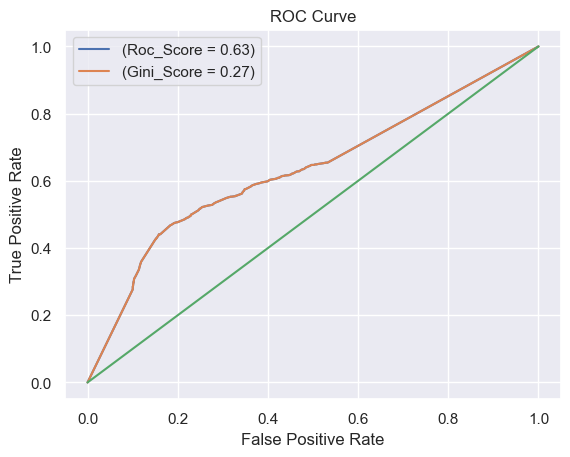

In [90]:
y_prob = dtc.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

In [91]:
rfc_base=RandomForestClassifier()
rfc_base.fit(X_train, y_train)

RandomForestClassifier()

In [92]:
result_rfc_base=evaluate(rfc_base, X_test, y_test)

Model Performance
Gini Score for Test: 41.48771756268373
Gini Score for Train: 88.02702791136596
Confusion Matrix [[4240  447]
 [ 833  480]]
Classification report               precision    recall  f1-score   support

           0       0.84      0.90      0.87      4687
           1       0.52      0.37      0.43      1313

    accuracy                           0.79      6000
   macro avg       0.68      0.64      0.65      6000
weighted avg       0.77      0.79      0.77      6000



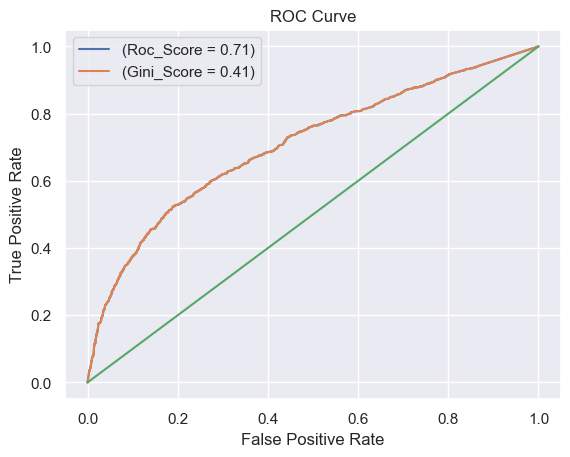

In [93]:
y_prob = rfc_base.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

In [94]:
from sklearn.feature_selection import SelectFromModel

In [95]:
sfm = SelectFromModel(rfc_base)
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [96]:
selected_feature= X_train.columns[(sfm.get_support())]
selected_feature

Index(['LIMIT_BAL', 'PAY_0', 'PAY_2'], dtype='object')

In [97]:
feature_scores = pd.Series(rfc_base.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

LIMIT_BAL                 0.382438
PAY_0                     0.177683
PAY_2                     0.077637
PAY_3                     0.065467
PAY_6                     0.059735
PAY_4                     0.058471
PAY_5                     0.052106
MARRIAGE_single           0.032905
SEX_male                  0.031054
EDUCATION_university      0.028742
EDUCATION_high school     0.021761
MARRIAGE_others           0.007057
EDUCATION_others          0.004803
EDUCATION_not educated    0.000143
dtype: float64

In [98]:
X_train=X_train[['LIMIT_BAL', 'PAY_0', 'PAY_2']]
X_test=X_test[['LIMIT_BAL', 'PAY_0', 'PAY_2']]

In [99]:
rfc_importance=RandomForestClassifier()
rfc_importance.fit(X_train, y_train)

RandomForestClassifier()

In [100]:
result_rfc_importance=evaluate(rfc_importance, X_test, y_test)

Model Performance
Gini Score for Test: 46.352317692257316
Gini Score for Train: 55.36838013435257
Confusion Matrix [[4464  223]
 [ 884  429]]
Classification report               precision    recall  f1-score   support

           0       0.83      0.95      0.89      4687
           1       0.66      0.33      0.44      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



In [101]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [102]:
rfc_randomized = RandomizedSearchCV(estimator = rfc_base, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=1, random_state=42, n_jobs = -1)

rfc_randomized.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklear

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [103]:
result_rfc_randomized=evaluate(rfc_randomized, X_test, y_test)

Model Performance
Gini Score for Test: 48.01165284997752
Gini Score for Train: 54.300811371853605
Confusion Matrix [[4450  237]
 [ 877  436]]
Classification report               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.65      0.33      0.44      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000



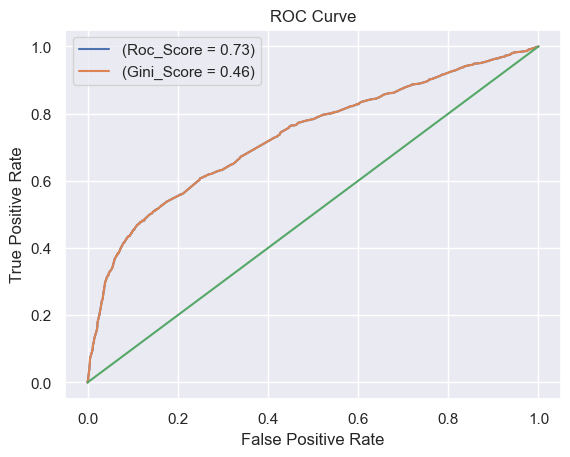

In [104]:
y_prob = rfc_importance.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

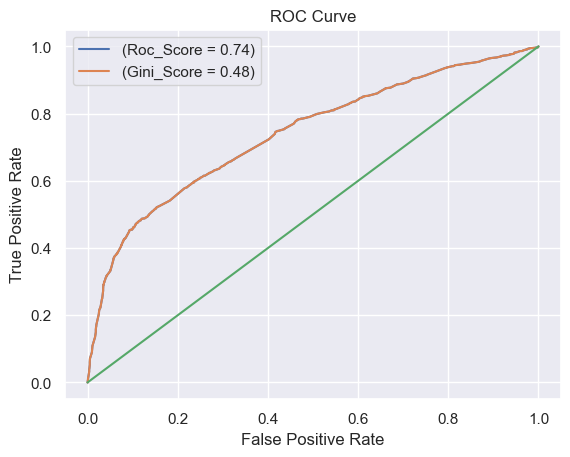

In [105]:
y_prob = rfc_randomized.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

In [106]:
catboost_base_dummy=CatBoostClassifier()
catboost_base_dummy.fit(X_train, y_train)

Learning rate set to 0.040021
0:	learn: 0.6709115	total: 163ms	remaining: 2m 42s
1:	learn: 0.6514378	total: 183ms	remaining: 1m 31s
2:	learn: 0.6334366	total: 194ms	remaining: 1m 4s
3:	learn: 0.6164143	total: 208ms	remaining: 51.7s
4:	learn: 0.6015237	total: 220ms	remaining: 43.9s
5:	learn: 0.5872938	total: 237ms	remaining: 39.3s
6:	learn: 0.5748353	total: 253ms	remaining: 35.9s
7:	learn: 0.5638773	total: 263ms	remaining: 32.6s
8:	learn: 0.5536047	total: 276ms	remaining: 30.4s
9:	learn: 0.5440447	total: 295ms	remaining: 29.2s
10:	learn: 0.5349723	total: 313ms	remaining: 28.1s
11:	learn: 0.5268840	total: 327ms	remaining: 26.9s
12:	learn: 0.5200472	total: 338ms	remaining: 25.6s
13:	learn: 0.5134415	total: 355ms	remaining: 25s
14:	learn: 0.5073691	total: 372ms	remaining: 24.4s
15:	learn: 0.5016949	total: 392ms	remaining: 24.1s
16:	learn: 0.4969842	total: 408ms	remaining: 23.6s
17:	learn: 0.4922870	total: 425ms	remaining: 23.2s
18:	learn: 0.4887397	total: 438ms	remaining: 22.6s
19:	learn: 

In [107]:
result_catboost_base_dummy=evaluate(catboost_base_dummy, X_test, y_test)

Model Performance
Gini Score for Test: 48.270442576581104
Gini Score for Train: 54.33734411259745
Confusion Matrix [[4485  202]
 [ 894  419]]
Classification report               precision    recall  f1-score   support

           0       0.83      0.96      0.89      4687
           1       0.67      0.32      0.43      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



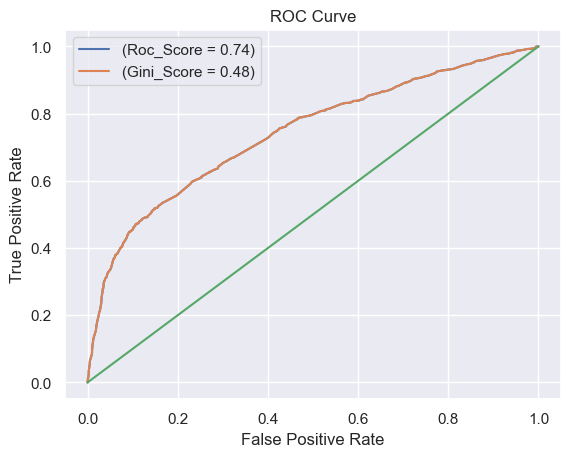

In [108]:
y_prob = catboost_base_dummy.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

In [109]:
xgboost_base=XGBClassifier()
xgboost_base.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [110]:
result_xgboost_base=evaluate(xgboost_base, X_test, y_test)

Model Performance
Gini Score for Test: 47.438890054339986
Gini Score for Train: 54.57491153660199
Confusion Matrix [[4467  220]
 [ 882  431]]
Classification report               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.66      0.33      0.44      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



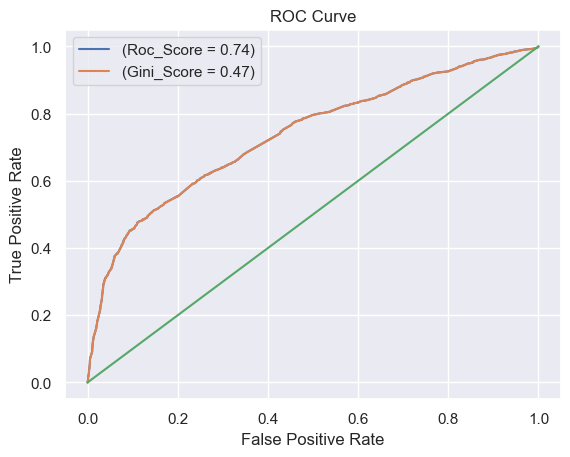

In [111]:
y_prob = xgboost_base.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

In [112]:
lightgbm_base=LGBMClassifier()
lightgbm_base.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 5323, number of negative: 18677
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 64
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221792 -> initscore=-1.255256
[LightGBM] [Info] Start training from score -1.255256


LGBMClassifier()

In [113]:
result_lightgbm_base=evaluate(lightgbm_base, X_test, y_test)

Model Performance
Gini Score for Test: 48.542134415637506
Gini Score for Train: 54.01324378238552
Confusion Matrix [[4495  192]
 [ 892  421]]
Classification report               precision    recall  f1-score   support

           0       0.83      0.96      0.89      4687
           1       0.69      0.32      0.44      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



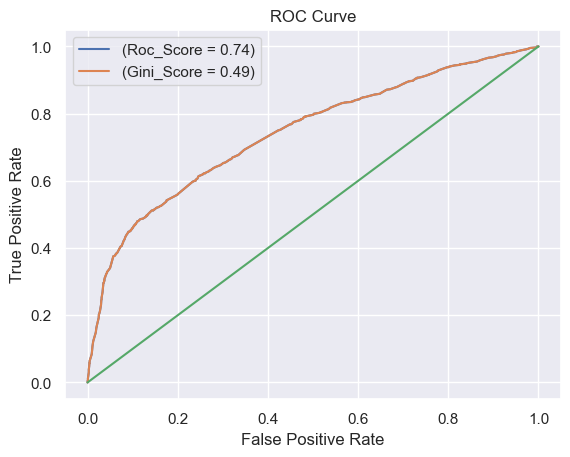

In [114]:
y_prob = lightgbm_base.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

In [115]:
#Hyperparameter Tuning (Lightgbm)
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 10],
    'num_leaves': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]    
}

param_distributions

{'n_estimators': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'max_depth': [3, 5, 7, 10],
 'num_leaves': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [116]:
lightgbm_randomized=RandomizedSearchCV(lightgbm_base, 
                                       param_distributions=param_distributions, 
                                       n_iter=10, cv=5, 
                                       n_jobs=-1, 
                                       random_state=42)

lightgbm_randomized.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 5323, number of negative: 18677
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 64
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221792 -> initscore=-1.255256
[LightGBM] [Info] Start training from score -1.255256


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1.0],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [10, 50, 100, 500,
                                                         1000],
                                        'num_leaves': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100]},
                   random_state=42)

In [117]:
print('Best hyperparameters for the lightgbm:', lightgbm_randomized.best_params_)

Best hyperparameters for the lightgbm: {'num_leaves': 20, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.01}


In [118]:
optimized_lightgbm=lightgbm_randomized.best_estimator_

In [119]:
result_optimized_lightgbm = evaluate(optimized_lightgbm, X_test, y_test)

Model Performance
Gini Score for Test: 49.58247691634963
Gini Score for Train: 52.706714483383976
Confusion Matrix [[4504  183]
 [ 901  412]]
Classification report               precision    recall  f1-score   support

           0       0.83      0.96      0.89      4687
           1       0.69      0.31      0.43      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



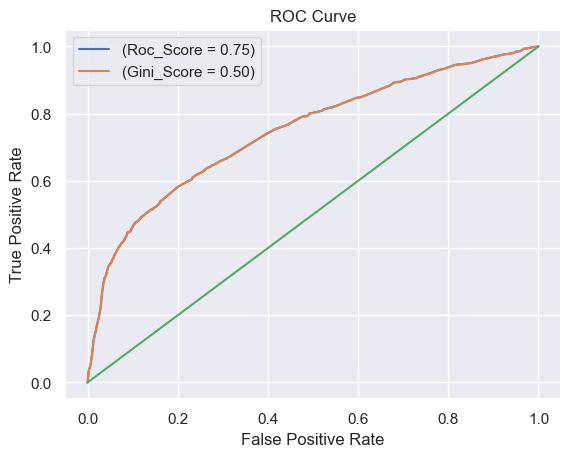

In [120]:
y_prob = optimized_lightgbm.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

In [121]:
#Hyperparameter Tuning (XGBoost)

param_distributions = {
    
    'n_estimators': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 10],
    'subsample': np.linspace(0.5, 1, num=6),
    'colsample_bytree': np.linspace(0.5, 1, num=6),
    'gamma': [0,1,5,10]
    
}

param_distributions

{'n_estimators': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'max_depth': [3, 5, 7, 10],
 'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'gamma': [0, 1, 5, 10]}

In [122]:
xgboost_randomized = RandomizedSearchCV(xgboost_base, 
                                        param_distributions=param_distributions, 
                                        n_iter=10, cv=5, 
                                        n_jobs=-1, 
                                        random_state=42)
xgboost_randomized.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'gamma': [0, 1, 5, 10],
                                        'learning_rate': [0.01, 0.1, 1.0],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [10, 50, 100, 500,
                                                         1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=42)

In [123]:
print('Best hyperparameters for XGBoost:', xgboost_randomized.best_params_)

Best hyperparameters for XGBoost: {'subsample': 0.5, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 10, 'colsample_bytree': 1.0}


In [124]:
optimized_xgboost=xgboost_randomized.best_estimator_

In [125]:
result_optimized_xgboost=evaluate(optimized_xgboost, X_test, y_test)

Model Performance
Gini Score for Test: 50.04162312474536
Gini Score for Train: 50.600506423048294
Confusion Matrix [[4514  173]
 [ 908  405]]
Classification report               precision    recall  f1-score   support

           0       0.83      0.96      0.89      4687
           1       0.70      0.31      0.43      1313

    accuracy                           0.82      6000
   macro avg       0.77      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



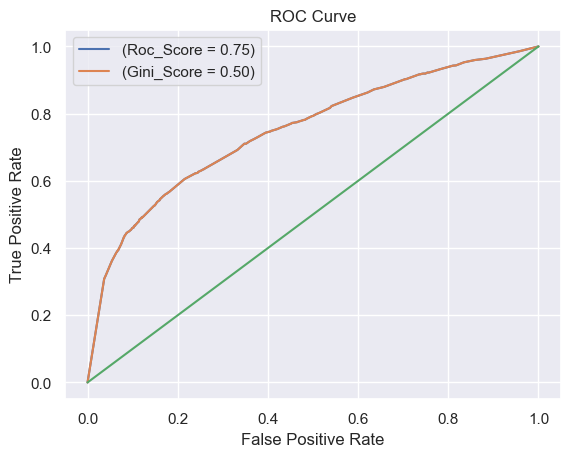

In [126]:
y_prob = optimized_xgboost.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

In [127]:
#Hyperparameter Tuning (CatBoost)

param_distributions = {
    
    'iterations': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'depth': [3, 5, 7, 9],
    'l2_leaf_reg': np.linspace(2, 30, num=7)
    
}

param_distributions

{'iterations': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'depth': [3, 5, 7, 9],
 'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
        25.33333333, 30.        ])}

In [128]:
catboost_randomized=RandomizedSearchCV(catboost_base_dummy, 
                                       param_distributions=param_distributions, 
                                       cv=5, n_iter=10, 
                                       random_state=42)

catboost_randomized.fit(X_train, y_train)

0:	learn: 0.6524282	total: 7.17ms	remaining: 352ms
1:	learn: 0.6193332	total: 14.3ms	remaining: 344ms
2:	learn: 0.5916201	total: 20.3ms	remaining: 318ms
3:	learn: 0.5691388	total: 25.6ms	remaining: 294ms
4:	learn: 0.5496849	total: 31.5ms	remaining: 283ms
5:	learn: 0.5333257	total: 36.9ms	remaining: 271ms
6:	learn: 0.5196553	total: 42.7ms	remaining: 263ms
7:	learn: 0.5081391	total: 51.9ms	remaining: 273ms
8:	learn: 0.4981846	total: 59ms	remaining: 269ms
9:	learn: 0.4897766	total: 66ms	remaining: 264ms
10:	learn: 0.4835528	total: 70.6ms	remaining: 250ms
11:	learn: 0.4773007	total: 77.1ms	remaining: 244ms
12:	learn: 0.4723072	total: 83.3ms	remaining: 237ms
13:	learn: 0.4681091	total: 89.1ms	remaining: 229ms
14:	learn: 0.4641478	total: 95.6ms	remaining: 223ms
15:	learn: 0.4608242	total: 101ms	remaining: 216ms
16:	learn: 0.4579770	total: 107ms	remaining: 208ms
17:	learn: 0.4558683	total: 112ms	remaining: 199ms
18:	learn: 0.4538264	total: 119ms	remaining: 194ms
19:	learn: 0.4520601	total: 12

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000002E060BEAD10>,
                   param_distributions={'depth': [3, 5, 7, 9],
                                        'iterations': [10, 50, 100, 500, 1000],
                                        'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
       25.33333333, 30.        ]),
                                        'learning_rate': [0.01, 0.1, 1.0]},
                   random_state=42)

In [129]:
print('Best hyperparameters for CatBoost:', catboost_randomized.best_params_)

Best hyperparameters for CatBoost: {'learning_rate': 0.1, 'l2_leaf_reg': 30.0, 'iterations': 50, 'depth': 5}


In [130]:
optimized_catboost=catboost_randomized.best_estimator_

In [131]:
result_optimized_catboost=evaluate(optimized_catboost, X_test, y_test)

Model Performance
Gini Score for Test: 50.16333196891598
Gini Score for Train: 51.06027981685468
Confusion Matrix [[4506  181]
 [ 901  412]]
Classification report               precision    recall  f1-score   support

           0       0.83      0.96      0.89      4687
           1       0.69      0.31      0.43      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



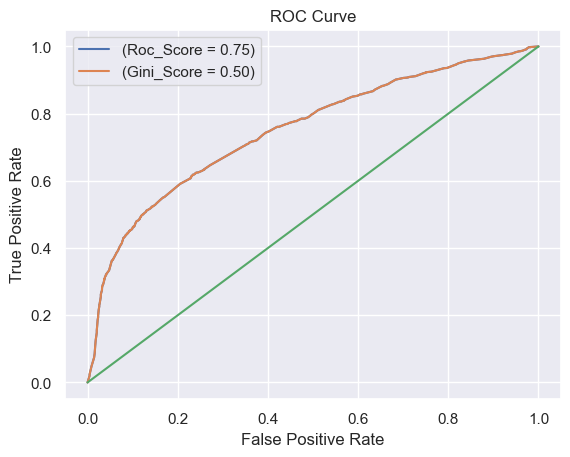

In [132]:
y_prob = optimized_catboost.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

In [133]:
#Stacking Model

base_classifiers = [
    catboost_base_dummy,
    optimized_xgboost,
    optimized_lightgbm,
    rfc_randomized
    
]

In [134]:
meta_classifier = optimized_catboost

In [135]:
stacking_classifier = StackingCVClassifier(classifiers=base_classifiers,
                                           meta_classifier=meta_classifier,
                                           cv=5,
                                           use_probas=True,
                                           use_features_in_secondary=True,
                                           verbose=1,
                                           random_state=42)

In [136]:
stacking_classifier.fit(X_train, y_train)

Fitting 4 classifiers...
Fitting classifier1: catboostclassifier (1/4)
Learning rate set to 0.036383
0:	learn: 0.6728639	total: 14.4ms	remaining: 14.4s
1:	learn: 0.6541414	total: 32.9ms	remaining: 16.4s
2:	learn: 0.6379905	total: 43.7ms	remaining: 14.5s
3:	learn: 0.6224138	total: 60.1ms	remaining: 15s
4:	learn: 0.6082877	total: 74.3ms	remaining: 14.8s
5:	learn: 0.5951091	total: 89.6ms	remaining: 14.8s
6:	learn: 0.5832058	total: 104ms	remaining: 14.8s
7:	learn: 0.5719794	total: 118ms	remaining: 14.6s
8:	learn: 0.5615994	total: 134ms	remaining: 14.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


9:	learn: 0.5520093	total: 148ms	remaining: 14.7s
10:	learn: 0.5432565	total: 164ms	remaining: 14.7s
11:	learn: 0.5357129	total: 178ms	remaining: 14.6s
12:	learn: 0.5286618	total: 188ms	remaining: 14.3s
13:	learn: 0.5221752	total: 199ms	remaining: 14s
14:	learn: 0.5161404	total: 212ms	remaining: 13.9s
15:	learn: 0.5103578	total: 227ms	remaining: 14s
16:	learn: 0.5054175	total: 237ms	remaining: 13.7s
17:	learn: 0.5004468	total: 251ms	remaining: 13.7s
18:	learn: 0.4957504	total: 265ms	remaining: 13.7s
19:	learn: 0.4914179	total: 280ms	remaining: 13.7s
20:	learn: 0.4878992	total: 294ms	remaining: 13.7s
21:	learn: 0.4842581	total: 309ms	remaining: 13.7s
22:	learn: 0.4810396	total: 323ms	remaining: 13.7s
23:	learn: 0.4781034	total: 334ms	remaining: 13.6s
24:	learn: 0.4754628	total: 345ms	remaining: 13.4s
25:	learn: 0.4733478	total: 359ms	remaining: 13.5s
26:	learn: 0.4711270	total: 377ms	remaining: 13.6s
27:	learn: 0.4691200	total: 389ms	remaining: 13.5s
28:	learn: 0.4670728	total: 405ms	re

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier3: lgbmclassifier (3/4)
[LightGBM] [Info] Number of positive: 4259, number of negative: 14941
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 64
[LightGBM] [Info] Number of data points in the train set: 19200, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221823 -> initscore=-1.255075
[LightGBM] [Info] Start training from score -1.255075
[LightGBM] [Info] Number of positive: 4259, number of negative: 14941
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 64
[LightGBM] [Info] Number of data points in the train set: 19200, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier4: randomizedsearchcv (4/4)
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklea

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklear

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklea

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklea

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklea

Learning rate set to 0.040021
0:	learn: 0.6709115	total: 15.1ms	remaining: 15.1s
1:	learn: 0.6514378	total: 31.9ms	remaining: 15.9s
2:	learn: 0.6334366	total: 47.6ms	remaining: 15.8s
3:	learn: 0.6164143	total: 62.8ms	remaining: 15.6s
4:	learn: 0.6015237	total: 77ms	remaining: 15.3s
5:	learn: 0.5872938	total: 93.7ms	remaining: 15.5s
6:	learn: 0.5748353	total: 113ms	remaining: 16s
7:	learn: 0.5638773	total: 126ms	remaining: 15.6s
8:	learn: 0.5536047	total: 140ms	remaining: 15.4s
9:	learn: 0.5440447	total: 157ms	remaining: 15.6s
10:	learn: 0.5349723	total: 169ms	remaining: 15.2s
11:	learn: 0.5268840	total: 187ms	remaining: 15.4s
12:	learn: 0.5200472	total: 199ms	remaining: 15.1s
13:	learn: 0.5134415	total: 213ms	remaining: 15s
14:	learn: 0.5073691	total: 229ms	remaining: 15.1s
15:	learn: 0.5016949	total: 246ms	remaining: 15.1s
16:	learn: 0.4969842	total: 257ms	remaining: 14.8s
17:	learn: 0.4922870	total: 273ms	remaining: 14.9s
18:	learn: 0.4887397	total: 283ms	remaining: 14.6s
19:	learn: 

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklea

0:	learn: 0.6520413	total: 10.4ms	remaining: 510ms
1:	learn: 0.6181915	total: 20.4ms	remaining: 491ms
2:	learn: 0.5901748	total: 29.7ms	remaining: 465ms
3:	learn: 0.5671946	total: 39.1ms	remaining: 449ms
4:	learn: 0.5475063	total: 48.3ms	remaining: 435ms
5:	learn: 0.5310517	total: 57.1ms	remaining: 418ms
6:	learn: 0.5175431	total: 66.5ms	remaining: 408ms
7:	learn: 0.5059712	total: 75.8ms	remaining: 398ms
8:	learn: 0.4961036	total: 84.3ms	remaining: 384ms
9:	learn: 0.4877289	total: 93.4ms	remaining: 373ms
10:	learn: 0.4805226	total: 103ms	remaining: 367ms
11:	learn: 0.4745013	total: 112ms	remaining: 355ms
12:	learn: 0.4695128	total: 121ms	remaining: 345ms
13:	learn: 0.4652440	total: 131ms	remaining: 336ms
14:	learn: 0.4615505	total: 139ms	remaining: 325ms
15:	learn: 0.4584882	total: 148ms	remaining: 315ms
16:	learn: 0.4558032	total: 157ms	remaining: 305ms
17:	learn: 0.4536146	total: 166ms	remaining: 294ms
18:	learn: 0.4518052	total: 174ms	remaining: 284ms
19:	learn: 0.4501076	total: 183

StackingCVClassifier(classifiers=[<catboost.core.CatBoostClassifier object at 0x000002E060BEAD10>,
                                  XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=1.0,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=10,
                                                grow_policy=None,
                                                impor...
                                                                                        70,
                                                                                        80,
                                                                                        90,
                                                                                        100,
                                                                                        110],
                                                                          'max_features': ['auto',
                                                                                           'sqrt'],
                                                                          'min_samples_leaf': [1,
                                                                                               2,
                                                                                               4],
                                                                          'min_samples_split': [2,
                                                                                                5,
                                                                                                10],
                                                                          'n_estimators': [200,
                                                                                           400,
                                                                                           600,
                                                                                           800,
                                                                                           1000,
                                                                                           1200,
                                                                                           1400,
                                                                                           1600,
                                                                                           1800,
                                                                                           2000]},
                                                     random_state=42,
                                                     verbose=1)],
                     cv=5,
                     meta_classifier=<catboost.core.CatBoostClassifier object at 0x000002E0051AE1D0>,
                     random_state=42, use_features_in_secondary=True,
                     use_probas=True, verbose=1)

In [137]:
result_stacking_classifier=evaluate(stacking_classifier, X_test, y_test)

Model Performance
Gini Score for Test: 49.75839413223624
Gini Score for Train: 52.69303281103819
Confusion Matrix [[4505  182]
 [ 901  412]]
Classification report               precision    recall  f1-score   support

           0       0.83      0.96      0.89      4687
           1       0.69      0.31      0.43      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



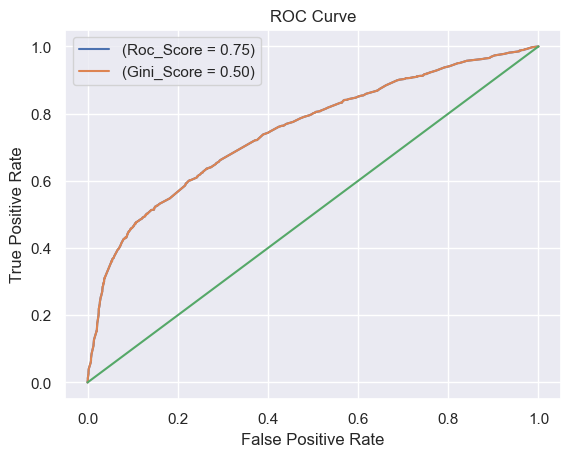

In [138]:
y_prob = stacking_classifier.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

In [139]:
svc_base=SVC(probability=True)
svc_base.fit(X_train, y_train)

SVC(probability=True)

In [140]:
result_svc_base=evaluate(svc_base, X_test, y_test)

Model Performance
Gini Score for Test: -7.802463133513616
Gini Score for Train: -4.530520534925831
Confusion Matrix [[4687    0]
 [1313    0]]
Classification report               precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


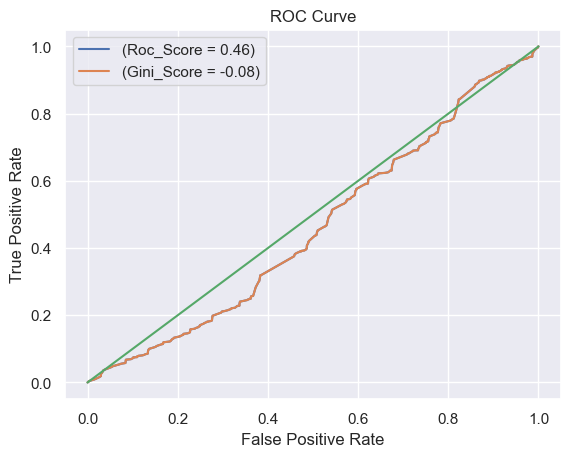

In [141]:
y_prob = svc_base.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

In [142]:
from sklearn.model_selection import RandomizedSearchCV

kernel = ['linear', 'poly', 'rbf', 'sigmoid']

gamma = ['scale', 'auto'] 

C = [1, 10, 100, 1000]


random_grid = {'kernel': kernel,
               'gamma': gamma,
               'C': C}
print(random_grid)

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto'], 'C': [1, 10, 100, 1000]}


In [143]:
svc_randomized = RandomizedSearchCV(estimator = svc_base, 
                                    param_distributions = random_grid, 
                                    n_iter = 1, 
                                    cv = 2, 
                                    verbose=1, 
                                    n_jobs = -1)

svc_randomized.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


RandomizedSearchCV(cv=2, estimator=SVC(probability=True), n_iter=1, n_jobs=-1,
                   param_distributions={'C': [1, 10, 100, 1000],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   verbose=1)

In [144]:
svc_randomized.best_params_

{'kernel': 'sigmoid', 'gamma': 'scale', 'C': 1000}

In [145]:
optimized_svc=svc_randomized.best_estimator_
result_optimized_svc=evaluate(optimized_svc, X_test, y_test)

Model Performance
Gini Score for Test: -15.118643373749652
Gini Score for Train: -12.742181417627451
Confusion Matrix [[3796  891]
 [ 999  314]]
Classification report               precision    recall  f1-score   support

           0       0.79      0.81      0.80      4687
           1       0.26      0.24      0.25      1313

    accuracy                           0.69      6000
   macro avg       0.53      0.52      0.53      6000
weighted avg       0.68      0.69      0.68      6000



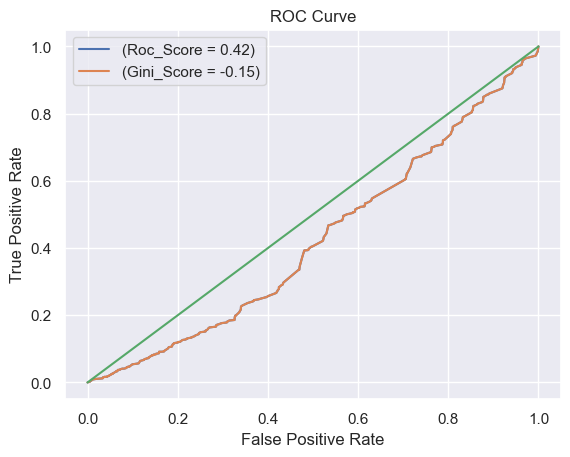

In [146]:
y_prob = svc_randomized.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

In [147]:
optimized_svc_2=SVC(kernel='rbf', gamma='auto', C=1000, probability=True)

In [148]:
optimized_svc_2.fit(X_train, y_train)

SVC(C=1000, gamma='auto', probability=True)

In [149]:
result_optimized_svc_2=evaluate(optimized_svc_2, X_test, y_test)

Model Performance
Gini Score for Test: 33.87019012416415
Gini Score for Train: 38.46184246259401
Confusion Matrix [[4441  246]
 [ 876  437]]
Classification report               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.64      0.33      0.44      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000



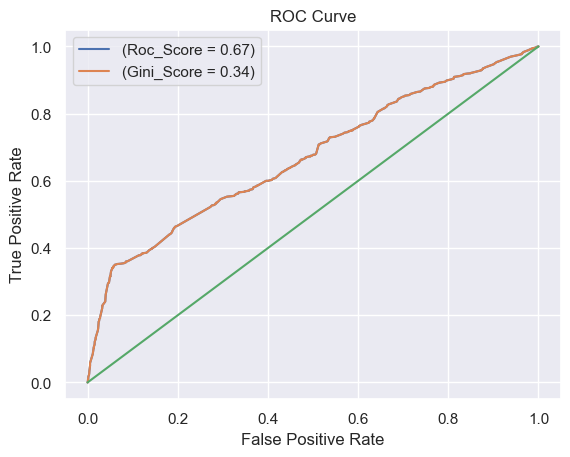

In [150]:
y_prob = optimized_svc_2.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

## Univariate Analysis

In [151]:
variables= []
train_Gini=[]
test_Gini=[]

for i in X_train.columns:
    X_train_single=X_train[[i]]
    X_test_single=X_test[[i]]
    
    optimized_catboost.fit(X_train_single, y_train)
    y_prob_train_single=optimized_catboost.predict_proba(X_train_single)[:, 1]
    
    
    roc_prob_train=roc_auc_score(y_train, y_prob_train_single)
    gini_prob_train=2*roc_prob_train-1
    
    
    optimized_catboost.fit(X_test_single, y_test)
    y_prob_test_single=optimized_catboost.predict_proba(X_test_single)[:, 1]
    
    
    roc_prob_test=roc_auc_score(y_test, y_prob_test_single)
    gini_prob_test=2*roc_prob_test-1
    
    
    variables.append(i)
    train_Gini.append(gini_prob_train)
    test_Gini.append(gini_prob_test)
    

df = pd.DataFrame({'Variable': variables, 'Train Gini': train_Gini, 'Test Gini': test_Gini})

df= df.sort_values(by='Test Gini', ascending=False)

df   

0:	learn: 0.6622458	total: 8.71ms	remaining: 427ms
1:	learn: 0.6376319	total: 16.3ms	remaining: 390ms
2:	learn: 0.6170313	total: 23.7ms	remaining: 372ms
3:	learn: 0.6000743	total: 30.5ms	remaining: 350ms
4:	learn: 0.5860071	total: 37.3ms	remaining: 336ms
5:	learn: 0.5741961	total: 46ms	remaining: 337ms
6:	learn: 0.5644142	total: 54.2ms	remaining: 333ms
7:	learn: 0.5563217	total: 61.4ms	remaining: 322ms
8:	learn: 0.5497131	total: 68.4ms	remaining: 311ms
9:	learn: 0.5437973	total: 75.6ms	remaining: 303ms
10:	learn: 0.5388615	total: 83ms	remaining: 294ms
11:	learn: 0.5349629	total: 90.1ms	remaining: 285ms
12:	learn: 0.5314607	total: 97.2ms	remaining: 277ms
13:	learn: 0.5286430	total: 104ms	remaining: 268ms
14:	learn: 0.5262107	total: 112ms	remaining: 261ms
15:	learn: 0.5241595	total: 119ms	remaining: 253ms
16:	learn: 0.5224352	total: 126ms	remaining: 245ms
17:	learn: 0.5210260	total: 133ms	remaining: 237ms
18:	learn: 0.5198856	total: 141ms	remaining: 230ms
19:	learn: 0.5189022	total: 148m

,Variable,Train Gini,Test Gini
1,PAY_0,0.427156,0.412811
2,PAY_2,0.305128,0.290487
0,LIMIT_BAL,0.239051,0.238598


## Catboost model with categorical columns

In [152]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default
0,20000.0,female,university,married,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1
1,120000.0,female,university,single,-1.0,1.5,0.0,0.0,0.0,1.5,1
2,90000.0,female,university,single,0.0,0.0,0.0,0.0,0.0,0.0,0
3,50000.0,female,university,married,0.0,0.0,0.0,0.0,0.0,0.0,0
4,50000.0,male,university,married,-1.0,0.0,-1.0,0.0,0.0,0.0,0


In [153]:
X=data.drop('default', axis=1)
y=data['default']

In [154]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

In [155]:
def evaluate(model, X_test, y_test):
    
    y_pred_test = model.predict(X_test)
    y_prob_test = model.predict_proba(X_test)[:,1]
    
    roc_score_test = roc_auc_score(y_test, y_prob_test)
    gini_score_test= roc_score_test*2-1
    
    y_pred_train = model.predict(X_train)
    y_prob_train = model.predict_proba(X_train)[:,1]
    
    roc_score_train = roc_auc_score(y_train, y_prob_train)
    gini_score_train = roc_score_train*2-1
    
    confusion_matrix=metrics.confusion_matrix(y_test, y_pred_test)
    report=classification_report(y_test, y_pred_test)
    
    print('Model Performance')

    print('Gini Score for Test:', gini_score_test*100)
    
    print('Gini Score for Train:', gini_score_train*100)
    
    print('Confusion Matrix', confusion_matrix)
    
    print('Classification report', report)

In [156]:
catboost_with_cat=CatBoostClassifier(cat_features=['SEX', 'EDUCATION', 'MARRIAGE'])
catboost_with_cat.fit(X_train, y_train)

Learning rate set to 0.040021
0:	learn: 0.6705802	total: 94.6ms	remaining: 1m 34s
1:	learn: 0.6505368	total: 173ms	remaining: 1m 26s
2:	learn: 0.6318591	total: 260ms	remaining: 1m 26s
3:	learn: 0.6148855	total: 336ms	remaining: 1m 23s
4:	learn: 0.6006518	total: 380ms	remaining: 1m 15s
5:	learn: 0.5864766	total: 450ms	remaining: 1m 14s
6:	learn: 0.5734301	total: 533ms	remaining: 1m 15s
7:	learn: 0.5619360	total: 598ms	remaining: 1m 14s
8:	learn: 0.5510315	total: 672ms	remaining: 1m 14s
9:	learn: 0.5410288	total: 750ms	remaining: 1m 14s
10:	learn: 0.5319248	total: 826ms	remaining: 1m 14s
11:	learn: 0.5241200	total: 887ms	remaining: 1m 13s
12:	learn: 0.5165625	total: 967ms	remaining: 1m 13s
13:	learn: 0.5097920	total: 1.05s	remaining: 1m 13s
14:	learn: 0.5035374	total: 1.13s	remaining: 1m 14s
15:	learn: 0.4980799	total: 1.2s	remaining: 1m 14s
16:	learn: 0.4929911	total: 1.27s	remaining: 1m 13s
17:	learn: 0.4883528	total: 1.35s	remaining: 1m 13s
18:	learn: 0.4839751	total: 1.42s	remaining:

In [157]:
result_catboost_with_cat=evaluate(catboost_with_cat, X_test, y_test)

Model Performance
Gini Score for Test: 53.32532449056562
Gini Score for Train: 61.23779443596096
Confusion Matrix [[4437  250]
 [ 835  478]]
Classification report               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.66      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



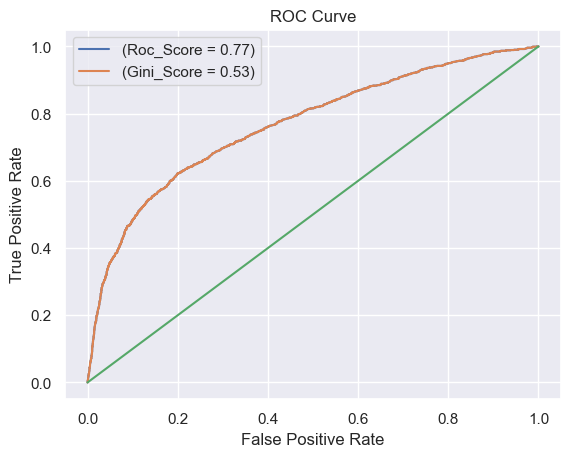

In [158]:
y_prob = catboost_with_cat.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

In [197]:
from catboost import CatBoostClassifier, Pool
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']

variables = []
train_Gini = []
test_Gini = []


catboost_with_cat = CatBoostClassifier()

for col in X.columns:

    X_train_single = X_train[[col]]
    X_test_single = X_test[[col]]

    cat_features_indices = [X_train_single.columns.get_loc(c) for c in categorical_cols if c in X_train_single]
    train_pool = Pool(X_train_single, label=y_train, cat_features=cat_features_indices)
    test_pool = Pool(X_test_single, label=y_test, cat_features=cat_features_indices)
    

    catboost_with_cat.fit(train_pool, verbose=False)
    

    y_prob_train_single = catboost_with_cat.predict_proba(train_pool)[:, 1]
    roc_prob_train = roc_auc_score(y_train, y_prob_train_single)
    gini_prob_train = 2 * roc_prob_train - 1
    

    y_prob_test_single = catboost_with_cat.predict_proba(test_pool)[:, 1]
    roc_prob_test = roc_auc_score(y_test, y_prob_test_single)
    gini_prob_test = 2 * roc_prob_test - 1
    

    variables.append(col)
    train_Gini.append(gini_prob_train)
    test_Gini.append(gini_prob_test)


df = pd.DataFrame({'Variable': variables, 'Train Gini': train_Gini, 'Test Gini': test_Gini})


df = df.sort_values(by='Test Gini', ascending=False)


df

,Variable,Train Gini,Test Gini
4,PAY_0,0.427156,0.412811
5,PAY_2,0.305128,0.290487
6,PAY_3,0.266936,0.262124
7,PAY_4,0.238938,0.231238
0,LIMIT_BAL,0.248120,0.231035
8,PAY_5,0.214785,0.230576
9,PAY_6,0.199616,0.215867
2,EDUCATION,0.085655,0.071999
1,SEX,0.050688,0.032649
3,MARRIAGE,-0.000971,-0.001518
